#### データ選択
- 対象データ: プロ野球Freak 
- 対象team: 西武

#### 問題設定
- 2009年から2022年までの日付や対戦相手など5-6の指標 (説明変数)を元に
ホームゲームの観客数を予測する回帰モデルを作り、重要な指標を理解する。

In [1]:
import pandas as pd
import japanize_matplotlib

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

#### データ収集
- 2009年から2022年までの西部ライオンのデータを収集する。

In [3]:
years = [f'{year:02}' for year in range(9, 23)]
urls = [f'https://baseball-freak.com/audience/{year}/lions.html' for year in years]
dfs = {year: pd.read_html(url)[2] for (year, url) in zip(years, urls)}
dfs

{'09':           日付       観客数 勝敗     スコア    対戦相手   先発投手  試合時間     球場      日付.1
 0    4月7日(火)  24,011 人  ○   8 - 3   オリックス      岸  3:16  西武ドーム   4月7日(火)
 1    4月8日(水)  10,001 人  ●  2 - 10   オリックス    石井一  3:05  西武ドーム   4月8日(水)
 2    4月9日(木)   9,813 人  ○  13 - 6   オリックス     西口  2:57  西武ドーム   4月9日(木)
 3   4月17日(金)  15,181 人  ●   2 - 4    日本ハム     涌井  3:20  西武ドーム  4月17日(金)
 4   4月18日(土)  28,525 人  ●   4 - 6    日本ハム     帆足  3:24  西武ドーム  4月18日(土)
 5   4月19日(日)  22,315 人  ●   6 - 8    日本ハム  ワズディン  4:02  西武ドーム  4月19日(日)
 6   4月24日(金)  12,618 人  ○   3 - 1     ロッテ     涌井  2:26  西武ドーム  4月24日(金)
 7   4月25日(土)  23,147 人  ●   2 - 3     ロッテ     帆足  3:05  西武ドーム  4月25日(土)
 8   4月26日(日)  23,647 人  ●  5 - 11     ロッテ  ワズディン  3:35  西武ドーム  4月26日(日)
 9   4月28日(火)  16,151 人  ○   5 - 4  ソフトバンク      岸  3:10  西武ドーム  4月28日(火)
 10  4月29日(水)  28,855 人  ○   7 - 2  ソフトバンク    石井一  2:56  西武ドーム  4月29日(水)
 11  4月30日(木)  15,720 人  ●   5 - 8  ソフトバンク     西口  3:33  西武ドーム  4月30日(木)
 12   5月4日(月)  33,911 人  ○   8 - 3      楽天   

#### データ前処理
- 年columnを追加する。

In [4]:
def add_year(year, df):
    df['年'] = int(f'20{year}')
    return df
dfs = [add_year(k, v) for (k, v) in dfs.items()]
df = pd.concat(dfs).reset_index(drop=True)
df

日付       観客数 勝敗     スコア    対戦相手  先発投手  試合時間       球場      日付.1  \
0      4月7日(火)  24,011 人  ○   8 - 3   オリックス     岸  3:16    西武ドーム   4月7日(火)   
1      4月8日(水)  10,001 人  ●  2 - 10   オリックス   石井一  3:05    西武ドーム   4月8日(水)   
2      4月9日(木)   9,813 人  ○  13 - 6   オリックス    西口  2:57    西武ドーム   4月9日(木)   
3     4月17日(金)  15,181 人  ●   2 - 4    日本ハム    涌井  3:20    西武ドーム  4月17日(金)   
4     4月18日(土)  28,525 人  ●   4 - 6    日本ハム    帆足  3:24    西武ドーム  4月18日(土)   
...        ...       ... ..     ...     ...   ...   ...      ...       ...   
996   9月19日(月)  27,475 人  ●   4 - 6      楽天    内海  4:17  ベルーナドーム  9月19日(月)   
997   9月20日(火)  14,063 人  ○   4 - 1      楽天  髙橋光成  2:52  ベルーナドーム  9月20日(火)   
998   9月27日(火)  24,030 人  ○   4 - 1  ソフトバンク  髙橋光成  2:48  ベルーナドーム  9月27日(火)   
999   10月1日(土)  27,313 人  ○   3 - 1  ソフトバンク    松本  3:45  ベルーナドーム  10月1日(土)   
1000  10月2日(日)  27,259 人  ●   2 - 4    日本ハム   エンス  3:08  ベルーナドーム  10月2日(日)   

         年  
0     2009  
1     2009  
2     2009  
3     2009  
4     2009  
...    ...  
996   2022  
997   2022  
998   2022  
999   2022  
1000  2022  

[1001 rows x 10 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日付      1001 non-null   object
 1   観客数     993 non-null    object
 2   勝敗      1001 non-null   object
 3   スコア     1001 non-null   object
 4   対戦相手    1001 non-null   object
 5   先発投手    993 non-null    object
 6   試合時間    993 non-null    object
 7   球場      1001 non-null   object
 8   日付.1    1001 non-null   object
 9   年       1001 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 78.3+ KB


- コロナ期間に行われた観客数がnullか"`-`"のrowsは削除する。
- 観客数を数字typeに変換する。

In [6]:
df['観客数'].value_counts()

-           15
33,917 人     3
33,901 人     3
33,916 人     3
33,920 人     2
            ..
29,846 人     1
27,382 人     1
21,689 人     1
27,680 人     1
27,259 人     1
Name: 観客数, Length: 942, dtype: int64

In [7]:
df = df.dropna(subset=['観客数'])
df = df[df['観客数'] != '-'].reset_index(drop=True)
df

日付       観客数 勝敗     スコア    対戦相手  先発投手  試合時間       球場      日付.1  \
0     4月7日(火)  24,011 人  ○   8 - 3   オリックス     岸  3:16    西武ドーム   4月7日(火)   
1     4月8日(水)  10,001 人  ●  2 - 10   オリックス   石井一  3:05    西武ドーム   4月8日(水)   
2     4月9日(木)   9,813 人  ○  13 - 6   オリックス    西口  2:57    西武ドーム   4月9日(木)   
3    4月17日(金)  15,181 人  ●   2 - 4    日本ハム    涌井  3:20    西武ドーム  4月17日(金)   
4    4月18日(土)  28,525 人  ●   4 - 6    日本ハム    帆足  3:24    西武ドーム  4月18日(土)   
..        ...       ... ..     ...     ...   ...   ...      ...       ...   
973  9月19日(月)  27,475 人  ●   4 - 6      楽天    内海  4:17  ベルーナドーム  9月19日(月)   
974  9月20日(火)  14,063 人  ○   4 - 1      楽天  髙橋光成  2:52  ベルーナドーム  9月20日(火)   
975  9月27日(火)  24,030 人  ○   4 - 1  ソフトバンク  髙橋光成  2:48  ベルーナドーム  9月27日(火)   
976  10月1日(土)  27,313 人  ○   3 - 1  ソフトバンク    松本  3:45  ベルーナドーム  10月1日(土)   
977  10月2日(日)  27,259 人  ●   2 - 4    日本ハム   エンス  3:08  ベルーナドーム  10月2日(日)   

        年  
0    2009  
1    2009  
2    2009  
3    2009  
4    2009  
..    ...  
973  2022  
974  2022  
975  2022  
976  2022  
977  2022  

[978 rows x 10 columns]

In [8]:
df['観客数'] = df['観客数'].str.replace(',', '').str.replace(' 人', '').astype(int)
df

日付    観客数 勝敗     スコア    対戦相手  先発投手  試合時間       球場      日付.1     年
0     4月7日(火)  24011  ○   8 - 3   オリックス     岸  3:16    西武ドーム   4月7日(火)  2009
1     4月8日(水)  10001  ●  2 - 10   オリックス   石井一  3:05    西武ドーム   4月8日(水)  2009
2     4月9日(木)   9813  ○  13 - 6   オリックス    西口  2:57    西武ドーム   4月9日(木)  2009
3    4月17日(金)  15181  ●   2 - 4    日本ハム    涌井  3:20    西武ドーム  4月17日(金)  2009
4    4月18日(土)  28525  ●   4 - 6    日本ハム    帆足  3:24    西武ドーム  4月18日(土)  2009
..        ...    ... ..     ...     ...   ...   ...      ...       ...   ...
973  9月19日(月)  27475  ●   4 - 6      楽天    内海  4:17  ベルーナドーム  9月19日(月)  2022
974  9月20日(火)  14063  ○   4 - 1      楽天  髙橋光成  2:52  ベルーナドーム  9月20日(火)  2022
975  9月27日(火)  24030  ○   4 - 1  ソフトバンク  髙橋光成  2:48  ベルーナドーム  9月27日(火)  2022
976  10月1日(土)  27313  ○   3 - 1  ソフトバンク    松本  3:45  ベルーナドーム  10月1日(土)  2022
977  10月2日(日)  27259  ●   2 - 4    日本ハム   エンス  3:08  ベルーナドーム  10月2日(日)  2022

[978 rows x 10 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日付      978 non-null    object
 1   観客数     978 non-null    int64 
 2   勝敗      978 non-null    object
 3   スコア     978 non-null    object
 4   対戦相手    978 non-null    object
 5   先発投手    978 non-null    object
 6   試合時間    978 non-null    object
 7   球場      978 non-null    object
 8   日付.1    978 non-null    object
 9   年       978 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 76.5+ KB


- 日付columnは２つなので、１つを削除する。

In [10]:
df = df.drop(columns=['日付.1'])
df

日付    観客数 勝敗     スコア    対戦相手  先発投手  試合時間       球場     年
0     4月7日(火)  24011  ○   8 - 3   オリックス     岸  3:16    西武ドーム  2009
1     4月8日(水)  10001  ●  2 - 10   オリックス   石井一  3:05    西武ドーム  2009
2     4月9日(木)   9813  ○  13 - 6   オリックス    西口  2:57    西武ドーム  2009
3    4月17日(金)  15181  ●   2 - 4    日本ハム    涌井  3:20    西武ドーム  2009
4    4月18日(土)  28525  ●   4 - 6    日本ハム    帆足  3:24    西武ドーム  2009
..        ...    ... ..     ...     ...   ...   ...      ...   ...
973  9月19日(月)  27475  ●   4 - 6      楽天    内海  4:17  ベルーナドーム  2022
974  9月20日(火)  14063  ○   4 - 1      楽天  髙橋光成  2:52  ベルーナドーム  2022
975  9月27日(火)  24030  ○   4 - 1  ソフトバンク  髙橋光成  2:48  ベルーナドーム  2022
976  10月1日(土)  27313  ○   3 - 1  ソフトバンク    松本  3:45  ベルーナドーム  2022
977  10月2日(日)  27259  ●   2 - 4    日本ハム   エンス  3:08  ベルーナドーム  2022

[978 rows x 9 columns]

- 月、日、曜日columnsを追加して日付から月、日、曜日を取得し、各columnに入れる。
- 日付columnは削除する。

In [11]:
df['月'] = df['日付'].str.extract(r'(\d+(?=月))').astype(int)
df['日'] = df['日付'].str.extract(r'(\d+(?=日))').astype(int)
df['曜日'] = df['日付'].str.extract(r'\((.*)\)')
df = df.drop(columns=['日付'])
df

観客数 勝敗     スコア    対戦相手  先発投手  試合時間       球場     年   月   日 曜日
0    24011  ○   8 - 3   オリックス     岸  3:16    西武ドーム  2009   4   7  火
1    10001  ●  2 - 10   オリックス   石井一  3:05    西武ドーム  2009   4   8  水
2     9813  ○  13 - 6   オリックス    西口  2:57    西武ドーム  2009   4   9  木
3    15181  ●   2 - 4    日本ハム    涌井  3:20    西武ドーム  2009   4  17  金
4    28525  ●   4 - 6    日本ハム    帆足  3:24    西武ドーム  2009   4  18  土
..     ... ..     ...     ...   ...   ...      ...   ...  ..  .. ..
973  27475  ●   4 - 6      楽天    内海  4:17  ベルーナドーム  2022   9  19  月
974  14063  ○   4 - 1      楽天  髙橋光成  2:52  ベルーナドーム  2022   9  20  火
975  24030  ○   4 - 1  ソフトバンク  髙橋光成  2:48  ベルーナドーム  2022   9  27  火
976  27313  ○   3 - 1  ソフトバンク    松本  3:45  ベルーナドーム  2022  10   1  土
977  27259  ●   2 - 4    日本ハム   エンス  3:08  ベルーナドーム  2022  10   2  日

[978 rows x 11 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   観客数     978 non-null    int64 
 1   勝敗      978 non-null    object
 2   スコア     978 non-null    object
 3   対戦相手    978 non-null    object
 4   先発投手    978 non-null    object
 5   試合時間    978 non-null    object
 6   球場      978 non-null    object
 7   年       978 non-null    int64 
 8   月       978 non-null    int64 
 9   日       978 non-null    int64 
 10  曜日      978 non-null    object
dtypes: int64(4), object(7)
memory usage: 84.2+ KB


- 気象情報とjoinするため、年月日columnを追加し、気温、降水量dataとmergeする。

In [13]:
df['年月日'] = df['年'].astype(str) + '/' + df['月'].astype(str) + '/' + df['日'].astype(str)
df

観客数 勝敗     スコア    対戦相手  先発投手  試合時間       球場     年   月   日 曜日        年月日
0    24011  ○   8 - 3   オリックス     岸  3:16    西武ドーム  2009   4   7  火   2009/4/7
1    10001  ●  2 - 10   オリックス   石井一  3:05    西武ドーム  2009   4   8  水   2009/4/8
2     9813  ○  13 - 6   オリックス    西口  2:57    西武ドーム  2009   4   9  木   2009/4/9
3    15181  ●   2 - 4    日本ハム    涌井  3:20    西武ドーム  2009   4  17  金  2009/4/17
4    28525  ●   4 - 6    日本ハム    帆足  3:24    西武ドーム  2009   4  18  土  2009/4/18
..     ... ..     ...     ...   ...   ...      ...   ...  ..  .. ..        ...
973  27475  ●   4 - 6      楽天    内海  4:17  ベルーナドーム  2022   9  19  月  2022/9/19
974  14063  ○   4 - 1      楽天  髙橋光成  2:52  ベルーナドーム  2022   9  20  火  2022/9/20
975  24030  ○   4 - 1  ソフトバンク  髙橋光成  2:48  ベルーナドーム  2022   9  27  火  2022/9/27
976  27313  ○   3 - 1  ソフトバンク    松本  3:45  ベルーナドーム  2022  10   1  土  2022/10/1
977  27259  ●   2 - 4    日本ハム   エンス  3:08  ベルーナドーム  2022  10   2  日  2022/10/2

[978 rows x 12 columns]

In [14]:
weather_df = pd.read_csv('weather.csv')
weather_df

年月日  降水量の合計(mm)  平均気温(℃)
0     2009/3/20         2.5     13.0
1     2009/3/21         0.0      9.6
2     2009/3/22         2.5     12.4
3     2009/3/23         0.0     11.2
4     2009/3/24         0.0      7.4
...         ...         ...      ...
3229  2022/11/1         0.0     13.3
3230  2022/11/2         0.0     14.9
3231  2022/11/3         0.0     15.2
3232  2022/11/4         0.0     14.0
3233  2022/11/5         0.0     12.0

[3234 rows x 3 columns]

In [15]:
weather_df.describe()

降水量の合計(mm)      平均気温(℃)
count  3234.00000  3234.000000
mean      5.36008    19.904731
std      15.80038     5.780232
min       0.00000     2.800000
25%       0.00000    15.900000
50%       0.00000    20.300000
75%       2.50000    24.500000
max     342.00000    31.900000

In [16]:
df = pd.merge(df, weather_df, on='年月日')
df

観客数 勝敗     スコア    対戦相手  先発投手  試合時間       球場     年   月   日 曜日  \
0    24011  ○   8 - 3   オリックス     岸  3:16    西武ドーム  2009   4   7  火   
1    10001  ●  2 - 10   オリックス   石井一  3:05    西武ドーム  2009   4   8  水   
2     9813  ○  13 - 6   オリックス    西口  2:57    西武ドーム  2009   4   9  木   
3    15181  ●   2 - 4    日本ハム    涌井  3:20    西武ドーム  2009   4  17  金   
4    28525  ●   4 - 6    日本ハム    帆足  3:24    西武ドーム  2009   4  18  土   
..     ... ..     ...     ...   ...   ...      ...   ...  ..  .. ..   
973  27475  ●   4 - 6      楽天    内海  4:17  ベルーナドーム  2022   9  19  月   
974  14063  ○   4 - 1      楽天  髙橋光成  2:52  ベルーナドーム  2022   9  20  火   
975  24030  ○   4 - 1  ソフトバンク  髙橋光成  2:48  ベルーナドーム  2022   9  27  火   
976  27313  ○   3 - 1  ソフトバンク    松本  3:45  ベルーナドーム  2022  10   1  土   
977  27259  ●   2 - 4    日本ハム   エンス  3:08  ベルーナドーム  2022  10   2  日   

           年月日  降水量の合計(mm)  平均気温(℃)  
0     2009/4/7         0.0     14.2  
1     2009/4/8         0.0     14.1  
2     2009/4/9         0.0     16.5  
3    2009/4/17         5.0     10.8  
4    2009/4/18         0.0     13.6  
..         ...         ...      ...  
973  2022/9/19        48.5     26.1  
974  2022/9/20        15.5     22.3  
975  2022/9/27         0.0     22.6  
976  2022/10/1         0.0     21.8  
977  2022/10/2         0.0     21.6  

[978 rows x 14 columns]

In [17]:
df[df['降水量の合計(mm)'] != 0.0][['年月日', '降水量の合計(mm)']]

年月日  降水量の合計(mm)
3    2009/4/17         5.0
6    2009/4/24         1.5
7    2009/4/25        52.0
13    2009/5/5        11.5
14    2009/5/6        27.5
..         ...         ...
968   2022/9/8        15.0
969  2022/9/10         0.5
972  2022/9/18        85.5
973  2022/9/19        48.5
974  2022/9/20        15.5

[387 rows x 2 columns]

In [18]:
df = df.set_index('年月日')
df

観客数 勝敗     スコア    対戦相手  先発投手  試合時間       球場     年   月   日 曜日  \
年月日                                                                         
2009/4/7   24011  ○   8 - 3   オリックス     岸  3:16    西武ドーム  2009   4   7  火   
2009/4/8   10001  ●  2 - 10   オリックス   石井一  3:05    西武ドーム  2009   4   8  水   
2009/4/9    9813  ○  13 - 6   オリックス    西口  2:57    西武ドーム  2009   4   9  木   
2009/4/17  15181  ●   2 - 4    日本ハム    涌井  3:20    西武ドーム  2009   4  17  金   
2009/4/18  28525  ●   4 - 6    日本ハム    帆足  3:24    西武ドーム  2009   4  18  土   
...          ... ..     ...     ...   ...   ...      ...   ...  ..  .. ..   
2022/9/19  27475  ●   4 - 6      楽天    内海  4:17  ベルーナドーム  2022   9  19  月   
2022/9/20  14063  ○   4 - 1      楽天  髙橋光成  2:52  ベルーナドーム  2022   9  20  火   
2022/9/27  24030  ○   4 - 1  ソフトバンク  髙橋光成  2:48  ベルーナドーム  2022   9  27  火   
2022/10/1  27313  ○   3 - 1  ソフトバンク    松本  3:45  ベルーナドーム  2022  10   1  土   
2022/10/2  27259  ●   2 - 4    日本ハム   エンス  3:08  ベルーナドーム  2022  10   2  日   

           降水量の合計(mm)  平均気温(℃)  
年月日                             
2009/4/7          0.0     14.2  
2009/4/8          0.0     14.1  
2009/4/9          0.0     16.5  
2009/4/17         5.0     10.8  
2009/4/18         0.0     13.6  
...               ...      ...  
2022/9/19        48.5     26.1  
2022/9/20        15.5     22.3  
2022/9/27         0.0     22.6  
2022/10/1         0.0     21.8  
2022/10/2         0.0     21.6  

[978 rows x 13 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 2009/4/7 to 2022/10/2
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   観客数         978 non-null    int64  
 1   勝敗          978 non-null    object 
 2   スコア         978 non-null    object 
 3   対戦相手        978 non-null    object 
 4   先発投手        978 non-null    object 
 5   試合時間        978 non-null    object 
 6   球場          978 non-null    object 
 7   年           978 non-null    int64  
 8   月           978 non-null    int64  
 9   日           978 non-null    int64  
 10  曜日          978 non-null    object 
 11  降水量の合計(mm)  978 non-null    float64
 12  平均気温(℃)     978 non-null    float64
dtypes: float64(2), int64(4), object(7)
memory usage: 107.0+ KB


- スコアからhome teamのscore、away teamのscore、合計のscore、scoreの差を作成する。
- 当日スコアではなく、直前試合のスコアにshiftする。

In [20]:
df['スコア(ホーム)'] = df['スコア'].str.split(' - ').apply(lambda list_: int(list_[0]))
df['スコア(相手)'] = df['スコア'].str.split(' - ').apply(lambda list_: int(list_[1]))
df['スコア(合計)'] = df['スコア'].str.split(' - ').apply(lambda list_: sum(map(int, list_)))
df['スコア(差)'] = (df['スコア(ホーム)'] - df['スコア(相手)']).astype(int)
df = df[df.columns[df.columns != 'スコア']]
df

観客数 勝敗    対戦相手  先発投手  試合時間       球場     年   月   日 曜日  降水量の合計(mm)  \
年月日                                                                             
2009/4/7   24011  ○   オリックス     岸  3:16    西武ドーム  2009   4   7  火         0.0   
2009/4/8   10001  ●   オリックス   石井一  3:05    西武ドーム  2009   4   8  水         0.0   
2009/4/9    9813  ○   オリックス    西口  2:57    西武ドーム  2009   4   9  木         0.0   
2009/4/17  15181  ●    日本ハム    涌井  3:20    西武ドーム  2009   4  17  金         5.0   
2009/4/18  28525  ●    日本ハム    帆足  3:24    西武ドーム  2009   4  18  土         0.0   
...          ... ..     ...   ...   ...      ...   ...  ..  .. ..         ...   
2022/9/19  27475  ●      楽天    内海  4:17  ベルーナドーム  2022   9  19  月        48.5   
2022/9/20  14063  ○      楽天  髙橋光成  2:52  ベルーナドーム  2022   9  20  火        15.5   
2022/9/27  24030  ○  ソフトバンク  髙橋光成  2:48  ベルーナドーム  2022   9  27  火         0.0   
2022/10/1  27313  ○  ソフトバンク    松本  3:45  ベルーナドーム  2022  10   1  土         0.0   
2022/10/2  27259  ●    日本ハム   エンス  3:08  ベルーナドーム  2022  10   2  日         0.0   

           平均気温(℃)  スコア(ホーム)  スコア(相手)  スコア(合計)  スコア(差)  
年月日                                                     
2009/4/7      14.2         8        3       11       5  
2009/4/8      14.1         2       10       12      -8  
2009/4/9      16.5        13        6       19       7  
2009/4/17     10.8         2        4        6      -2  
2009/4/18     13.6         4        6       10      -2  
...            ...       ...      ...      ...     ...  
2022/9/19     26.1         4        6       10      -2  
2022/9/20     22.3         4        1        5       3  
2022/9/27     22.6         4        1        5       3  
2022/10/1     21.8         3        1        4       2  
2022/10/2     21.6         2        4        6      -2  

[978 rows x 16 columns]

In [21]:
df[['直前試合のスコア(ホーム)', '直前試合のスコア(相手)', '直前試合のスコア(合計)', '直前試合のスコア(差)']] = \
    df[['スコア(ホーム)', 'スコア(相手)', 'スコア(合計)', 'スコア(差)']].shift(1)
df

観客数 勝敗    対戦相手  先発投手  試合時間       球場     年   月   日 曜日  降水量の合計(mm)  \
年月日                                                                             
2009/4/7   24011  ○   オリックス     岸  3:16    西武ドーム  2009   4   7  火         0.0   
2009/4/8   10001  ●   オリックス   石井一  3:05    西武ドーム  2009   4   8  水         0.0   
2009/4/9    9813  ○   オリックス    西口  2:57    西武ドーム  2009   4   9  木         0.0   
2009/4/17  15181  ●    日本ハム    涌井  3:20    西武ドーム  2009   4  17  金         5.0   
2009/4/18  28525  ●    日本ハム    帆足  3:24    西武ドーム  2009   4  18  土         0.0   
...          ... ..     ...   ...   ...      ...   ...  ..  .. ..         ...   
2022/9/19  27475  ●      楽天    内海  4:17  ベルーナドーム  2022   9  19  月        48.5   
2022/9/20  14063  ○      楽天  髙橋光成  2:52  ベルーナドーム  2022   9  20  火        15.5   
2022/9/27  24030  ○  ソフトバンク  髙橋光成  2:48  ベルーナドーム  2022   9  27  火         0.0   
2022/10/1  27313  ○  ソフトバンク    松本  3:45  ベルーナドーム  2022  10   1  土         0.0   
2022/10/2  27259  ●    日本ハム   エンス  3:08  ベルーナドーム  2022  10   2  日         0.0   

           平均気温(℃)  スコア(ホーム)  スコア(相手)  スコア(合計)  スコア(差)  直前試合のスコア(ホーム)  \
年月日                                                                     
2009/4/7      14.2         8        3       11       5            NaN   
2009/4/8      14.1         2       10       12      -8            8.0   
2009/4/9      16.5        13        6       19       7            2.0   
2009/4/17     10.8         2        4        6      -2           13.0   
2009/4/18     13.6         4        6       10      -2            2.0   
...            ...       ...      ...      ...     ...            ...   
2022/9/19     26.1         4        6       10      -2            3.0   
2022/9/20     22.3         4        1        5       3            4.0   
2022/9/27     22.6         4        1        5       3            4.0   
2022/10/1     21.8         3        1        4       2            4.0   
2022/10/2     21.6         2        4        6      -2            3.0   

           直前試合のスコア(相手)  直前試合のスコア(合計)  直前試合のスコア(差)  
年月日                                                 
2009/4/7            NaN           NaN          NaN  
2009/4/8            3.0          11.0          5.0  
2009/4/9           10.0          12.0         -8.0  
2009/4/17           6.0          19.0          7.0  
2009/4/18           4.0           6.0         -2.0  
...                 ...           ...          ...  
2022/9/19           4.0           7.0         -1.0  
2022/9/20           6.0          10.0         -2.0  
2022/9/27           1.0           5.0          3.0  
2022/10/1           1.0           5.0          3.0  
2022/10/2           1.0           4.0          2.0  

[978 rows x 20 columns]

In [22]:
cols = ['直前試合のスコア(ホーム)', '直前試合のスコア(相手)', '直前試合のスコア(合計)', '直前試合のスコア(差)']
df[cols] = df[cols].fillna(df[cols].mode().astype(int).iloc[0])
df[cols] = df[cols].astype(int)
df

観客数 勝敗    対戦相手  先発投手  試合時間       球場     年   月   日 曜日  降水量の合計(mm)  \
年月日                                                                             
2009/4/7   24011  ○   オリックス     岸  3:16    西武ドーム  2009   4   7  火         0.0   
2009/4/8   10001  ●   オリックス   石井一  3:05    西武ドーム  2009   4   8  水         0.0   
2009/4/9    9813  ○   オリックス    西口  2:57    西武ドーム  2009   4   9  木         0.0   
2009/4/17  15181  ●    日本ハム    涌井  3:20    西武ドーム  2009   4  17  金         5.0   
2009/4/18  28525  ●    日本ハム    帆足  3:24    西武ドーム  2009   4  18  土         0.0   
...          ... ..     ...   ...   ...      ...   ...  ..  .. ..         ...   
2022/9/19  27475  ●      楽天    内海  4:17  ベルーナドーム  2022   9  19  月        48.5   
2022/9/20  14063  ○      楽天  髙橋光成  2:52  ベルーナドーム  2022   9  20  火        15.5   
2022/9/27  24030  ○  ソフトバンク  髙橋光成  2:48  ベルーナドーム  2022   9  27  火         0.0   
2022/10/1  27313  ○  ソフトバンク    松本  3:45  ベルーナドーム  2022  10   1  土         0.0   
2022/10/2  27259  ●    日本ハム   エンス  3:08  ベルーナドーム  2022  10   2  日         0.0   

           平均気温(℃)  スコア(ホーム)  スコア(相手)  スコア(合計)  スコア(差)  直前試合のスコア(ホーム)  \
年月日                                                                     
2009/4/7      14.2         8        3       11       5              3   
2009/4/8      14.1         2       10       12      -8              8   
2009/4/9      16.5        13        6       19       7              2   
2009/4/17     10.8         2        4        6      -2             13   
2009/4/18     13.6         4        6       10      -2              2   
...            ...       ...      ...      ...     ...            ...   
2022/9/19     26.1         4        6       10      -2              3   
2022/9/20     22.3         4        1        5       3              4   
2022/9/27     22.6         4        1        5       3              4   
2022/10/1     21.8         3        1        4       2              4   
2022/10/2     21.6         2        4        6      -2              3   

           直前試合のスコア(相手)  直前試合のスコア(合計)  直前試合のスコア(差)  
年月日                                                 
2009/4/7              2             7            1  
2009/4/8              3            11            5  
2009/4/9             10            12           -8  
2009/4/17             6            19            7  
2009/4/18             4             6           -2  
...                 ...           ...          ...  
2022/9/19             4             7           -1  
2022/9/20             6            10           -2  
2022/9/27             1             5            3  
2022/10/1             1             5            3  
2022/10/2             1             4            2  

[978 rows x 20 columns]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 2009/4/7 to 2022/10/2
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   観客数            978 non-null    int64  
 1   勝敗             978 non-null    object 
 2   対戦相手           978 non-null    object 
 3   先発投手           978 non-null    object 
 4   試合時間           978 non-null    object 
 5   球場             978 non-null    object 
 6   年              978 non-null    int64  
 7   月              978 non-null    int64  
 8   日              978 non-null    int64  
 9   曜日             978 non-null    object 
 10  降水量の合計(mm)     978 non-null    float64
 11  平均気温(℃)        978 non-null    float64
 12  スコア(ホーム)       978 non-null    int64  
 13  スコア(相手)        978 non-null    int64  
 14  スコア(合計)        978 non-null    int64  
 15  スコア(差)         978 non-null    int64  
 16  直前試合のスコア(ホーム)  978 non-null    int64  
 17  直前試合のスコア(相手)   978 non-null    int64  
 18  直前

- 球場の中で西武ドーム、メットライフ、西武プリンス、ベルーナドームは全部同じ球場なので、一つの名前にしておく。

In [24]:
df['球場'].value_counts()

西武ドーム      410
メットライフ     315
西武プリンス     136
ベルーナドーム     70
大宮          19
県営大宮        12
前橋           6
那覇           5
新潟           2
皇子山          2
東京ドーム        1
Name: 球場, dtype: int64

In [25]:
df = df.copy()
df['球場'] = df['球場'].apply(lambda stadium: '西武ドーム' if stadium in ['メットライフ', '西武プリンス', 'ベルーナドーム'] else stadium)
df['球場'].value_counts()

西武ドーム    931
大宮        19
県営大宮      12
前橋         6
那覇         5
新潟         2
皇子山        2
東京ドーム      1
Name: 球場, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 2009/4/7 to 2022/10/2
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   観客数            978 non-null    int64  
 1   勝敗             978 non-null    object 
 2   対戦相手           978 non-null    object 
 3   先発投手           978 non-null    object 
 4   試合時間           978 non-null    object 
 5   球場             978 non-null    object 
 6   年              978 non-null    int64  
 7   月              978 non-null    int64  
 8   日              978 non-null    int64  
 9   曜日             978 non-null    object 
 10  降水量の合計(mm)     978 non-null    float64
 11  平均気温(℃)        978 non-null    float64
 12  スコア(ホーム)       978 non-null    int64  
 13  スコア(相手)        978 non-null    int64  
 14  スコア(合計)        978 non-null    int64  
 15  スコア(差)         978 non-null    int64  
 16  直前試合のスコア(ホーム)  978 non-null    int64  
 17  直前試合のスコア(相手)   978 non-null    int64  
 18  直前

- 試合時間を分に変更する。

In [27]:
def convert_to_minutes(time):
    [h, min] = time.split(':')
    return int(h) * 60 + int(min)
df['試合時間'] = df['試合時間'].apply(convert_to_minutes)
df

観客数 勝敗    対戦相手  先発投手  試合時間     球場     年   月   日 曜日  降水量の合計(mm)  \
年月日                                                                           
2009/4/7   24011  ○   オリックス     岸   196  西武ドーム  2009   4   7  火         0.0   
2009/4/8   10001  ●   オリックス   石井一   185  西武ドーム  2009   4   8  水         0.0   
2009/4/9    9813  ○   オリックス    西口   177  西武ドーム  2009   4   9  木         0.0   
2009/4/17  15181  ●    日本ハム    涌井   200  西武ドーム  2009   4  17  金         5.0   
2009/4/18  28525  ●    日本ハム    帆足   204  西武ドーム  2009   4  18  土         0.0   
...          ... ..     ...   ...   ...    ...   ...  ..  .. ..         ...   
2022/9/19  27475  ●      楽天    内海   257  西武ドーム  2022   9  19  月        48.5   
2022/9/20  14063  ○      楽天  髙橋光成   172  西武ドーム  2022   9  20  火        15.5   
2022/9/27  24030  ○  ソフトバンク  髙橋光成   168  西武ドーム  2022   9  27  火         0.0   
2022/10/1  27313  ○  ソフトバンク    松本   225  西武ドーム  2022  10   1  土         0.0   
2022/10/2  27259  ●    日本ハム   エンス   188  西武ドーム  2022  10   2  日         0.0   

           平均気温(℃)  スコア(ホーム)  スコア(相手)  スコア(合計)  スコア(差)  直前試合のスコア(ホーム)  \
年月日                                                                     
2009/4/7      14.2         8        3       11       5              3   
2009/4/8      14.1         2       10       12      -8              8   
2009/4/9      16.5        13        6       19       7              2   
2009/4/17     10.8         2        4        6      -2             13   
2009/4/18     13.6         4        6       10      -2              2   
...            ...       ...      ...      ...     ...            ...   
2022/9/19     26.1         4        6       10      -2              3   
2022/9/20     22.3         4        1        5       3              4   
2022/9/27     22.6         4        1        5       3              4   
2022/10/1     21.8         3        1        4       2              4   
2022/10/2     21.6         2        4        6      -2              3   

           直前試合のスコア(相手)  直前試合のスコア(合計)  直前試合のスコア(差)  
年月日                                                 
2009/4/7              2             7            1  
2009/4/8              3            11            5  
2009/4/9             10            12           -8  
2009/4/17             6            19            7  
2009/4/18             4             6           -2  
...                 ...           ...          ...  
2022/9/19             4             7           -1  
2022/9/20             6            10           -2  
2022/9/27             1             5            3  
2022/10/1             1             5            3  
2022/10/2             1             4            2  

[978 rows x 20 columns]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 2009/4/7 to 2022/10/2
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   観客数            978 non-null    int64  
 1   勝敗             978 non-null    object 
 2   対戦相手           978 non-null    object 
 3   先発投手           978 non-null    object 
 4   試合時間           978 non-null    int64  
 5   球場             978 non-null    object 
 6   年              978 non-null    int64  
 7   月              978 non-null    int64  
 8   日              978 non-null    int64  
 9   曜日             978 non-null    object 
 10  降水量の合計(mm)     978 non-null    float64
 11  平均気温(℃)        978 non-null    float64
 12  スコア(ホーム)       978 non-null    int64  
 13  スコア(相手)        978 non-null    int64  
 14  スコア(合計)        978 non-null    int64  
 15  スコア(差)         978 non-null    int64  
 16  直前試合のスコア(ホーム)  978 non-null    int64  
 17  直前試合のスコア(相手)   978 non-null    int64  
 18  直前

- 30回以上現れた先発投手だけをcategorical variableとして扱い、他はその他にする。

In [29]:
df['先発投手'].value_counts().sort_values(ascending=False)

岸          83
菊池         83
野上         70
牧田         61
十亀         61
涌井         51
今井         40
西口         39
帆足         37
多和田        36
石井一        36
松本         28
高橋光        26
榎田         21
ニール        19
ウルフ        19
本田         15
髙橋光成       15
石井         13
平井         13
與座         12
エンス        11
髙橋         10
髙橋光        10
岡本洋         9
許           9
郭俊麟         9
浜屋          9
渡邉          7
隅田          7
平野          7
郭           7
ワズディン       7
松本航         7
佐藤          6
岡本          6
レイノルズ       6
内海          5
カスティーヨ      5
佐野          5
武隈          5
小石          4
ポーリーノ       4
バンヘッケン      4
ルブラン        4
藤原          4
上間          3
ダーモディ       3
伊藤          3
誠           3
高木勇         2
大沼          2
佐々木         2
スミス         2
増田          2
相内          2
ガルセス        1
木村          1
田中          1
松坂          1
ノリン         1
齊藤大         1
ファイフ        1
山本          1
ＭＩＣＨＥＡＬ     1
Name: 先発投手, dtype: int64

In [30]:
df['先発投手'] = df['先発投手'].apply(lambda name: name if df['先発投手'].value_counts()[name] >= 30 else 'その他')
df['先発投手'].value_counts()

その他    381
岸       83
菊池      83
野上      70
牧田      61
十亀      61
涌井      51
今井      40
西口      39
帆足      37
石井一     36
多和田     36
Name: 先発投手, dtype: int64

- ベイスターズの表記が複数あるので、一つにする 

In [31]:
df['対戦相手'].value_counts()

ロッテ       171
楽天        171
日本ハム      169
オリックス     166
ソフトバンク    166
巨人         24
広島         24
中日         21
ヤクルト       21
阪神         21
DeNA       18
横浜          6
Name: 対戦相手, dtype: int64

In [32]:
df['対戦相手'] = df['対戦相手'].apply(lambda opponent: 'DeNA' if opponent == '横浜' else opponent)
df['対戦相手'].value_counts()

ロッテ       171
楽天        171
日本ハム      169
オリックス     166
ソフトバンク    166
DeNA       24
巨人         24
広島         24
中日         21
ヤクルト       21
阪神         21
Name: 対戦相手, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 2009/4/7 to 2022/10/2
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   観客数            978 non-null    int64  
 1   勝敗             978 non-null    object 
 2   対戦相手           978 non-null    object 
 3   先発投手           978 non-null    object 
 4   試合時間           978 non-null    int64  
 5   球場             978 non-null    object 
 6   年              978 non-null    int64  
 7   月              978 non-null    int64  
 8   日              978 non-null    int64  
 9   曜日             978 non-null    object 
 10  降水量の合計(mm)     978 non-null    float64
 11  平均気温(℃)        978 non-null    float64
 12  スコア(ホーム)       978 non-null    int64  
 13  スコア(相手)        978 non-null    int64  
 14  スコア(合計)        978 non-null    int64  
 15  スコア(差)         978 non-null    int64  
 16  直前試合のスコア(ホーム)  978 non-null    int64  
 17  直前試合のスコア(相手)   978 non-null    int64  
 18  直前

- 直前試合の結果勝負を追加する。

In [34]:
df['直前試合の勝敗'] = df['勝敗'].shift(1)
df

観客数 勝敗    対戦相手 先発投手  試合時間     球場     年   月   日 曜日  降水量の合計(mm)  \
年月日                                                                          
2009/4/7   24011  ○   オリックス    岸   196  西武ドーム  2009   4   7  火         0.0   
2009/4/8   10001  ●   オリックス  石井一   185  西武ドーム  2009   4   8  水         0.0   
2009/4/9    9813  ○   オリックス   西口   177  西武ドーム  2009   4   9  木         0.0   
2009/4/17  15181  ●    日本ハム   涌井   200  西武ドーム  2009   4  17  金         5.0   
2009/4/18  28525  ●    日本ハム   帆足   204  西武ドーム  2009   4  18  土         0.0   
...          ... ..     ...  ...   ...    ...   ...  ..  .. ..         ...   
2022/9/19  27475  ●      楽天  その他   257  西武ドーム  2022   9  19  月        48.5   
2022/9/20  14063  ○      楽天  その他   172  西武ドーム  2022   9  20  火        15.5   
2022/9/27  24030  ○  ソフトバンク  その他   168  西武ドーム  2022   9  27  火         0.0   
2022/10/1  27313  ○  ソフトバンク  その他   225  西武ドーム  2022  10   1  土         0.0   
2022/10/2  27259  ●    日本ハム  その他   188  西武ドーム  2022  10   2  日         0.0   

           平均気温(℃)  スコア(ホーム)  スコア(相手)  スコア(合計)  スコア(差)  直前試合のスコア(ホーム)  \
年月日                                                                     
2009/4/7      14.2         8        3       11       5              3   
2009/4/8      14.1         2       10       12      -8              8   
2009/4/9      16.5        13        6       19       7              2   
2009/4/17     10.8         2        4        6      -2             13   
2009/4/18     13.6         4        6       10      -2              2   
...            ...       ...      ...      ...     ...            ...   
2022/9/19     26.1         4        6       10      -2              3   
2022/9/20     22.3         4        1        5       3              4   
2022/9/27     22.6         4        1        5       3              4   
2022/10/1     21.8         3        1        4       2              4   
2022/10/2     21.6         2        4        6      -2              3   

           直前試合のスコア(相手)  直前試合のスコア(合計)  直前試合のスコア(差) 直前試合の勝敗  
年月日                                                         
2009/4/7              2             7            1    None  
2009/4/8              3            11            5       ○  
2009/4/9             10            12           -8       ●  
2009/4/17             6            19            7       ○  
2009/4/18             4             6           -2       ●  
...                 ...           ...          ...     ...  
2022/9/19             4             7           -1       ●  
2022/9/20             6            10           -2       ●  
2022/9/27             1             5            3       ○  
2022/10/1             1             5            3       ○  
2022/10/2             1             4            2       ○  

[978 rows x 21 columns]

In [35]:
df['勝敗'].value_counts()

○    537
●    409
△     32
Name: 勝敗, dtype: int64

In [36]:
df['直前試合の勝敗'] = df['直前試合の勝敗'].fillna('△')
df

観客数 勝敗    対戦相手 先発投手  試合時間     球場     年   月   日 曜日  降水量の合計(mm)  \
年月日                                                                          
2009/4/7   24011  ○   オリックス    岸   196  西武ドーム  2009   4   7  火         0.0   
2009/4/8   10001  ●   オリックス  石井一   185  西武ドーム  2009   4   8  水         0.0   
2009/4/9    9813  ○   オリックス   西口   177  西武ドーム  2009   4   9  木         0.0   
2009/4/17  15181  ●    日本ハム   涌井   200  西武ドーム  2009   4  17  金         5.0   
2009/4/18  28525  ●    日本ハム   帆足   204  西武ドーム  2009   4  18  土         0.0   
...          ... ..     ...  ...   ...    ...   ...  ..  .. ..         ...   
2022/9/19  27475  ●      楽天  その他   257  西武ドーム  2022   9  19  月        48.5   
2022/9/20  14063  ○      楽天  その他   172  西武ドーム  2022   9  20  火        15.5   
2022/9/27  24030  ○  ソフトバンク  その他   168  西武ドーム  2022   9  27  火         0.0   
2022/10/1  27313  ○  ソフトバンク  その他   225  西武ドーム  2022  10   1  土         0.0   
2022/10/2  27259  ●    日本ハム  その他   188  西武ドーム  2022  10   2  日         0.0   

           平均気温(℃)  スコア(ホーム)  スコア(相手)  スコア(合計)  スコア(差)  直前試合のスコア(ホーム)  \
年月日                                                                     
2009/4/7      14.2         8        3       11       5              3   
2009/4/8      14.1         2       10       12      -8              8   
2009/4/9      16.5        13        6       19       7              2   
2009/4/17     10.8         2        4        6      -2             13   
2009/4/18     13.6         4        6       10      -2              2   
...            ...       ...      ...      ...     ...            ...   
2022/9/19     26.1         4        6       10      -2              3   
2022/9/20     22.3         4        1        5       3              4   
2022/9/27     22.6         4        1        5       3              4   
2022/10/1     21.8         3        1        4       2              4   
2022/10/2     21.6         2        4        6      -2              3   

           直前試合のスコア(相手)  直前試合のスコア(合計)  直前試合のスコア(差) 直前試合の勝敗  
年月日                                                         
2009/4/7              2             7            1       △  
2009/4/8              3            11            5       ○  
2009/4/9             10            12           -8       ●  
2009/4/17             6            19            7       ○  
2009/4/18             4             6           -2       ●  
...                 ...           ...          ...     ...  
2022/9/19             4             7           -1       ●  
2022/9/20             6            10           -2       ●  
2022/9/27             1             5            3       ○  
2022/10/1             1             5            3       ○  
2022/10/2             1             4            2       ○  

[978 rows x 21 columns]

- すでにあるfeatureを利用して、新しいfeatureを作る。

<AxesSubplot: xlabel='月'>

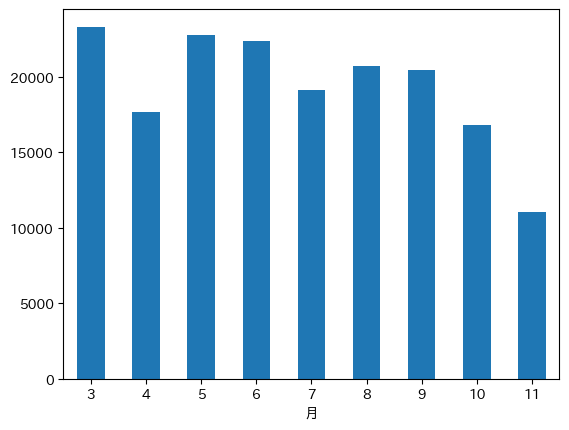

In [37]:
df.groupby(by='月')['観客数'].mean().plot.bar(rot=0)

In [38]:
df['月別平均観客数'] = df.groupby(by='月')['観客数'].transform('mean').round(2)
df

観客数 勝敗    対戦相手 先発投手  試合時間     球場     年   月   日 曜日  降水量の合計(mm)  \
年月日                                                                          
2009/4/7   24011  ○   オリックス    岸   196  西武ドーム  2009   4   7  火         0.0   
2009/4/8   10001  ●   オリックス  石井一   185  西武ドーム  2009   4   8  水         0.0   
2009/4/9    9813  ○   オリックス   西口   177  西武ドーム  2009   4   9  木         0.0   
2009/4/17  15181  ●    日本ハム   涌井   200  西武ドーム  2009   4  17  金         5.0   
2009/4/18  28525  ●    日本ハム   帆足   204  西武ドーム  2009   4  18  土         0.0   
...          ... ..     ...  ...   ...    ...   ...  ..  .. ..         ...   
2022/9/19  27475  ●      楽天  その他   257  西武ドーム  2022   9  19  月        48.5   
2022/9/20  14063  ○      楽天  その他   172  西武ドーム  2022   9  20  火        15.5   
2022/9/27  24030  ○  ソフトバンク  その他   168  西武ドーム  2022   9  27  火         0.0   
2022/10/1  27313  ○  ソフトバンク  その他   225  西武ドーム  2022  10   1  土         0.0   
2022/10/2  27259  ●    日本ハム  その他   188  西武ドーム  2022  10   2  日         0.0   

           平均気温(℃)  スコア(ホーム)  スコア(相手)  スコア(合計)  スコア(差)  直前試合のスコア(ホーム)  \
年月日                                                                     
2009/4/7      14.2         8        3       11       5              3   
2009/4/8      14.1         2       10       12      -8              8   
2009/4/9      16.5        13        6       19       7              2   
2009/4/17     10.8         2        4        6      -2             13   
2009/4/18     13.6         4        6       10      -2              2   
...            ...       ...      ...      ...     ...            ...   
2022/9/19     26.1         4        6       10      -2              3   
2022/9/20     22.3         4        1        5       3              4   
2022/9/27     22.6         4        1        5       3              4   
2022/10/1     21.8         3        1        4       2              4   
2022/10/2     21.6         2        4        6      -2              3   

           直前試合のスコア(相手)  直前試合のスコア(合計)  直前試合のスコア(差) 直前試合の勝敗   月別平均観客数  
年月日                                                                   
2009/4/7              2             7            1       △  17693.64  
2009/4/8              3            11            5       ○  17693.64  
2009/4/9             10            12           -8       ●  17693.64  
2009/4/17             6            19            7       ○  17693.64  
2009/4/18             4             6           -2       ●  17693.64  
...                 ...           ...          ...     ...       ...  
2022/9/19             4             7           -1       ●  20473.55  
2022/9/20             6            10           -2       ●  20473.55  
2022/9/27             1             5            3       ○  20473.55  
2022/10/1             1             5            3       ○  16821.42  
2022/10/2             1             4            2       ○  16821.42  

[978 rows x 22 columns]

In [39]:
len(df['月別平均観客数'].value_counts())

9

<AxesSubplot: xlabel='日'>

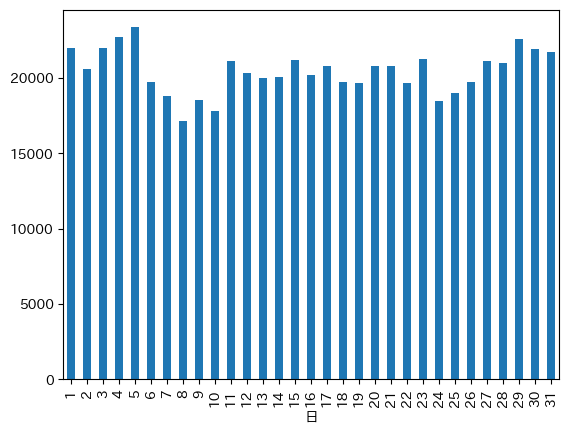

In [40]:
df.groupby(by='日')['観客数'].mean().plot.bar()

In [41]:
df['日別平均観客数'] = df.groupby(by='日')['観客数'].transform('mean').round(2)
df

観客数 勝敗    対戦相手 先発投手  試合時間     球場     年   月   日 曜日  降水量の合計(mm)  \
年月日                                                                          
2009/4/7   24011  ○   オリックス    岸   196  西武ドーム  2009   4   7  火         0.0   
2009/4/8   10001  ●   オリックス  石井一   185  西武ドーム  2009   4   8  水         0.0   
2009/4/9    9813  ○   オリックス   西口   177  西武ドーム  2009   4   9  木         0.0   
2009/4/17  15181  ●    日本ハム   涌井   200  西武ドーム  2009   4  17  金         5.0   
2009/4/18  28525  ●    日本ハム   帆足   204  西武ドーム  2009   4  18  土         0.0   
...          ... ..     ...  ...   ...    ...   ...  ..  .. ..         ...   
2022/9/19  27475  ●      楽天  その他   257  西武ドーム  2022   9  19  月        48.5   
2022/9/20  14063  ○      楽天  その他   172  西武ドーム  2022   9  20  火        15.5   
2022/9/27  24030  ○  ソフトバンク  その他   168  西武ドーム  2022   9  27  火         0.0   
2022/10/1  27313  ○  ソフトバンク  その他   225  西武ドーム  2022  10   1  土         0.0   
2022/10/2  27259  ●    日本ハム  その他   188  西武ドーム  2022  10   2  日         0.0   

           平均気温(℃)  スコア(ホーム)  スコア(相手)  スコア(合計)  スコア(差)  直前試合のスコア(ホーム)  \
年月日                                                                     
2009/4/7      14.2         8        3       11       5              3   
2009/4/8      14.1         2       10       12      -8              8   
2009/4/9      16.5        13        6       19       7              2   
2009/4/17     10.8         2        4        6      -2             13   
2009/4/18     13.6         4        6       10      -2              2   
...            ...       ...      ...      ...     ...            ...   
2022/9/19     26.1         4        6       10      -2              3   
2022/9/20     22.3         4        1        5       3              4   
2022/9/27     22.6         4        1        5       3              4   
2022/10/1     21.8         3        1        4       2              4   
2022/10/2     21.6         2        4        6      -2              3   

           直前試合のスコア(相手)  直前試合のスコア(合計)  直前試合のスコア(差) 直前試合の勝敗   月別平均観客数   日別平均観客数  
年月日                                                                             
2009/4/7              2             7            1       △  17693.64  18786.29  
2009/4/8              3            11            5       ○  17693.64  17143.54  
2009/4/9             10            12           -8       ●  17693.64  18510.93  
2009/4/17             6            19            7       ○  17693.64  20806.97  
2009/4/18             4             6           -2       ●  17693.64  19713.64  
...                 ...           ...          ...     ...       ...       ...  
2022/9/19             4             7           -1       ●  20473.55  19628.91  
2022/9/20             6            10           -2       ●  20473.55  20765.17  
2022/9/27             1             5            3       ○  20473.55  21138.49  
2022/10/1             1             5            3       ○  16821.42  22001.45  
2022/10/2             1             4            2       ○  16821.42  20570.03  

[978 rows x 23 columns]

In [42]:
len(df['日別平均観客数'].value_counts())

31

In [43]:
df.to_csv('data.csv')

In [44]:
df = pd.read_csv('data.csv', index_col='年月日')
df

観客数 勝敗    対戦相手 先発投手  試合時間     球場     年   月   日 曜日  降水量の合計(mm)  \
年月日                                                                          
2009/4/7   24011  ○   オリックス    岸   196  西武ドーム  2009   4   7  火         0.0   
2009/4/8   10001  ●   オリックス  石井一   185  西武ドーム  2009   4   8  水         0.0   
2009/4/9    9813  ○   オリックス   西口   177  西武ドーム  2009   4   9  木         0.0   
2009/4/17  15181  ●    日本ハム   涌井   200  西武ドーム  2009   4  17  金         5.0   
2009/4/18  28525  ●    日本ハム   帆足   204  西武ドーム  2009   4  18  土         0.0   
...          ... ..     ...  ...   ...    ...   ...  ..  .. ..         ...   
2022/9/19  27475  ●      楽天  その他   257  西武ドーム  2022   9  19  月        48.5   
2022/9/20  14063  ○      楽天  その他   172  西武ドーム  2022   9  20  火        15.5   
2022/9/27  24030  ○  ソフトバンク  その他   168  西武ドーム  2022   9  27  火         0.0   
2022/10/1  27313  ○  ソフトバンク  その他   225  西武ドーム  2022  10   1  土         0.0   
2022/10/2  27259  ●    日本ハム  その他   188  西武ドーム  2022  10   2  日         0.0   

           平均気温(℃)  スコア(ホーム)  スコア(相手)  スコア(合計)  スコア(差)  直前試合のスコア(ホーム)  \
年月日                                                                     
2009/4/7      14.2         8        3       11       5              3   
2009/4/8      14.1         2       10       12      -8              8   
2009/4/9      16.5        13        6       19       7              2   
2009/4/17     10.8         2        4        6      -2             13   
2009/4/18     13.6         4        6       10      -2              2   
...            ...       ...      ...      ...     ...            ...   
2022/9/19     26.1         4        6       10      -2              3   
2022/9/20     22.3         4        1        5       3              4   
2022/9/27     22.6         4        1        5       3              4   
2022/10/1     21.8         3        1        4       2              4   
2022/10/2     21.6         2        4        6      -2              3   

           直前試合のスコア(相手)  直前試合のスコア(合計)  直前試合のスコア(差) 直前試合の勝敗   月別平均観客数   日別平均観客数  
年月日                                                                             
2009/4/7              2             7            1       △  17693.64  18786.29  
2009/4/8              3            11            5       ○  17693.64  17143.54  
2009/4/9             10            12           -8       ●  17693.64  18510.93  
2009/4/17             6            19            7       ○  17693.64  20806.97  
2009/4/18             4             6           -2       ●  17693.64  19713.64  
...                 ...           ...          ...     ...       ...       ...  
2022/9/19             4             7           -1       ●  20473.55  19628.91  
2022/9/20             6            10           -2       ●  20473.55  20765.17  
2022/9/27             1             5            3       ○  20473.55  21138.49  
2022/10/1             1             5            3       ○  16821.42  22001.45  
2022/10/2             1             4            2       ○  16821.42  20570.03  

[978 rows x 23 columns]

#### one-hot encoding

In [45]:
df.columns

Index(['観客数', '勝敗', '対戦相手', '先発投手', '試合時間', '球場', '年', '月', '日', '曜日',
       '降水量の合計(mm)', '平均気温(℃)', 'スコア(ホーム)', 'スコア(相手)', 'スコア(合計)', 'スコア(差)',
       '直前試合のスコア(ホーム)', '直前試合のスコア(相手)', '直前試合のスコア(合計)', '直前試合のスコア(差)',
       '直前試合の勝敗', '月別平均観客数', '日別平均観客数'],
      dtype='object')

In [46]:
df = pd.get_dummies(df, columns=['勝敗', '直前試合の勝敗', '対戦相手', '先発投手', '球場', '曜日'], drop_first=True)
df

観客数  試合時間     年   月   日  降水量の合計(mm)  平均気温(℃)  スコア(ホーム)  スコア(相手)  \
年月日                                                                            
2009/4/7   24011   196  2009   4   7         0.0     14.2         8        3   
2009/4/8   10001   185  2009   4   8         0.0     14.1         2       10   
2009/4/9    9813   177  2009   4   9         0.0     16.5        13        6   
2009/4/17  15181   200  2009   4  17         5.0     10.8         2        4   
2009/4/18  28525   204  2009   4  18         0.0     13.6         4        6   
...          ...   ...   ...  ..  ..         ...      ...       ...      ...   
2022/9/19  27475   257  2022   9  19        48.5     26.1         4        6   
2022/9/20  14063   172  2022   9  20        15.5     22.3         4        1   
2022/9/27  24030   168  2022   9  27         0.0     22.6         4        1   
2022/10/1  27313   225  2022  10   1         0.0     21.8         3        1   
2022/10/2  27259   188  2022  10   2         0.0     21.6         2        4   

           スコア(合計)  スコア(差)  直前試合のスコア(ホーム)  直前試合のスコア(相手)  直前試合のスコア(合計)  \
年月日                                                                     
2009/4/7        11       5              3             2             7   
2009/4/8        12      -8              8             3            11   
2009/4/9        19       7              2            10            12   
2009/4/17        6      -2             13             6            19   
2009/4/18       10      -2              2             4             6   
...            ...     ...            ...           ...           ...   
2022/9/19       10      -2              3             4             7   
2022/9/20        5       3              4             6            10   
2022/9/27        5       3              4             1             5   
2022/10/1        4       2              4             1             5   
2022/10/2        6      -2              3             1             4   

           直前試合のスコア(差)   月別平均観客数   日別平均観客数  勝敗_○  勝敗_●  直前試合の勝敗_○  直前試合の勝敗_●  \
年月日                                                                            
2009/4/7             1  17693.64  18786.29     1     0          0          0   
2009/4/8             5  17693.64  17143.54     0     1          1          0   
2009/4/9            -8  17693.64  18510.93     1     0          0          1   
2009/4/17            7  17693.64  20806.97     0     1          1          0   
2009/4/18           -2  17693.64  19713.64     0     1          0          1   
...                ...       ...       ...   ...   ...        ...        ...   
2022/9/19           -1  20473.55  19628.91     0     1          0          1   
2022/9/20           -2  20473.55  20765.17     1     0          0          1   
2022/9/27            3  20473.55  21138.49     1     0          1          0   
2022/10/1            3  16821.42  22001.45     1     0          1          0   
2022/10/2            2  16821.42  20570.03     0     1          1          0   

           対戦相手_オリックス  対戦相手_ソフトバンク  対戦相手_ヤクルト  対戦相手_ロッテ  対戦相手_中日  対戦相手_巨人  \
年月日                                                                         
2009/4/7            1            0          0         0        0        0   
2009/4/8            1            0          0         0        0        0   
2009/4/9            1            0          0         0        0        0   
2009/4/17           0            0          0         0        0        0   
2009/4/18           0            0          0         0        0        0   
...               ...          ...        ...       ...      ...      ...   
2022/9/19           0            0          0         0        0        0   
2022/9/20           0            0          0         0        0        0   
2022/9/27           0            1          0         0        0        0   
2022/10/1           0            1          0         0        0        0   
2022/10/2           0            0          0         0  

In [47]:
df.to_csv('data_with_ohe.csv')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 2009/4/7 to 2022/10/2
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   観客数            978 non-null    int64  
 1   試合時間           978 non-null    int64  
 2   年              978 non-null    int64  
 3   月              978 non-null    int64  
 4   日              978 non-null    int64  
 5   降水量の合計(mm)     978 non-null    float64
 6   平均気温(℃)        978 non-null    float64
 7   スコア(ホーム)       978 non-null    int64  
 8   スコア(相手)        978 non-null    int64  
 9   スコア(合計)        978 non-null    int64  
 10  スコア(差)         978 non-null    int64  
 11  直前試合のスコア(ホーム)  978 non-null    int64  
 12  直前試合のスコア(相手)   978 non-null    int64  
 13  直前試合のスコア(合計)   978 non-null    int64  
 14  直前試合のスコア(差)    978 non-null    int64  
 15  月別平均観客数        978 non-null    float64
 16  日別平均観客数        978 non-null    float64
 17  勝敗_○           978 non-null    uint8  
 18  勝敗

#### データの可視化

- ヒートマップの描写

In [49]:
df.columns

Index(['観客数', '試合時間', '年', '月', '日', '降水量の合計(mm)', '平均気温(℃)', 'スコア(ホーム)',
       'スコア(相手)', 'スコア(合計)', 'スコア(差)', '直前試合のスコア(ホーム)', '直前試合のスコア(相手)',
       '直前試合のスコア(合計)', '直前試合のスコア(差)', '月別平均観客数', '日別平均観客数', '勝敗_○', '勝敗_●',
       '直前試合の勝敗_○', '直前試合の勝敗_●', '対戦相手_オリックス', '対戦相手_ソフトバンク', '対戦相手_ヤクルト',
       '対戦相手_ロッテ', '対戦相手_中日', '対戦相手_巨人', '対戦相手_広島', '対戦相手_日本ハム', '対戦相手_楽天',
       '対戦相手_阪神', '先発投手_今井', '先発投手_十亀', '先発投手_多和田', '先発投手_岸', '先発投手_帆足',
       '先発投手_涌井', '先発投手_牧田', '先発投手_石井一', '先発投手_菊池', '先発投手_西口', '先発投手_野上',
       '球場_大宮', '球場_新潟', '球場_東京ドーム', '球場_皇子山', '球場_県営大宮', '球場_西武ドーム', '球場_那覇',
       '曜日_日', '曜日_月', '曜日_木', '曜日_水', '曜日_火', '曜日_金'],
      dtype='object')

In [50]:
df_plot = df[df.columns[~df.columns.str.contains('_')]]
df_plot

観客数  試合時間     年   月   日  降水量の合計(mm)  平均気温(℃)  スコア(ホーム)  スコア(相手)  \
年月日                                                                            
2009/4/7   24011   196  2009   4   7         0.0     14.2         8        3   
2009/4/8   10001   185  2009   4   8         0.0     14.1         2       10   
2009/4/9    9813   177  2009   4   9         0.0     16.5        13        6   
2009/4/17  15181   200  2009   4  17         5.0     10.8         2        4   
2009/4/18  28525   204  2009   4  18         0.0     13.6         4        6   
...          ...   ...   ...  ..  ..         ...      ...       ...      ...   
2022/9/19  27475   257  2022   9  19        48.5     26.1         4        6   
2022/9/20  14063   172  2022   9  20        15.5     22.3         4        1   
2022/9/27  24030   168  2022   9  27         0.0     22.6         4        1   
2022/10/1  27313   225  2022  10   1         0.0     21.8         3        1   
2022/10/2  27259   188  2022  10   2         0.0     21.6         2        4   

           スコア(合計)  スコア(差)  直前試合のスコア(ホーム)  直前試合のスコア(相手)  直前試合のスコア(合計)  \
年月日                                                                     
2009/4/7        11       5              3             2             7   
2009/4/8        12      -8              8             3            11   
2009/4/9        19       7              2            10            12   
2009/4/17        6      -2             13             6            19   
2009/4/18       10      -2              2             4             6   
...            ...     ...            ...           ...           ...   
2022/9/19       10      -2              3             4             7   
2022/9/20        5       3              4             6            10   
2022/9/27        5       3              4             1             5   
2022/10/1        4       2              4             1             5   
2022/10/2        6      -2              3             1             4   

           直前試合のスコア(差)   月別平均観客数   日別平均観客数  
年月日                                         
2009/4/7             1  17693.64  18786.29  
2009/4/8             5  17693.64  17143.54  
2009/4/9            -8  17693.64  18510.93  
2009/4/17            7  17693.64  20806.97  
2009/4/18           -2  17693.64  19713.64  
...                ...       ...       ...  
2022/9/19           -1  20473.55  19628.91  
2022/9/20           -2  20473.55  20765.17  
2022/9/27            3  20473.55  21138.49  
2022/10/1            3  16821.42  22001.45  
2022/10/2            2  16821.42  20570.03  

[978 rows x 17 columns]

<AxesSubplot: >

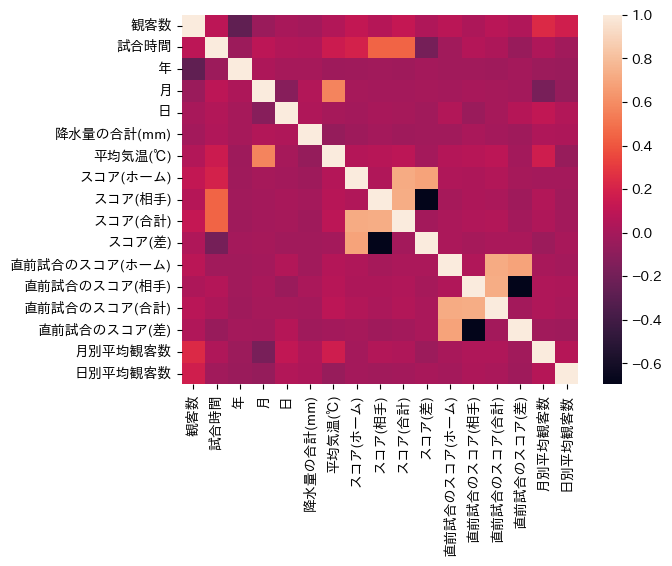

In [51]:
import seaborn as sns

sns.heatmap(df_plot.corr())

- 散布図行列の描写

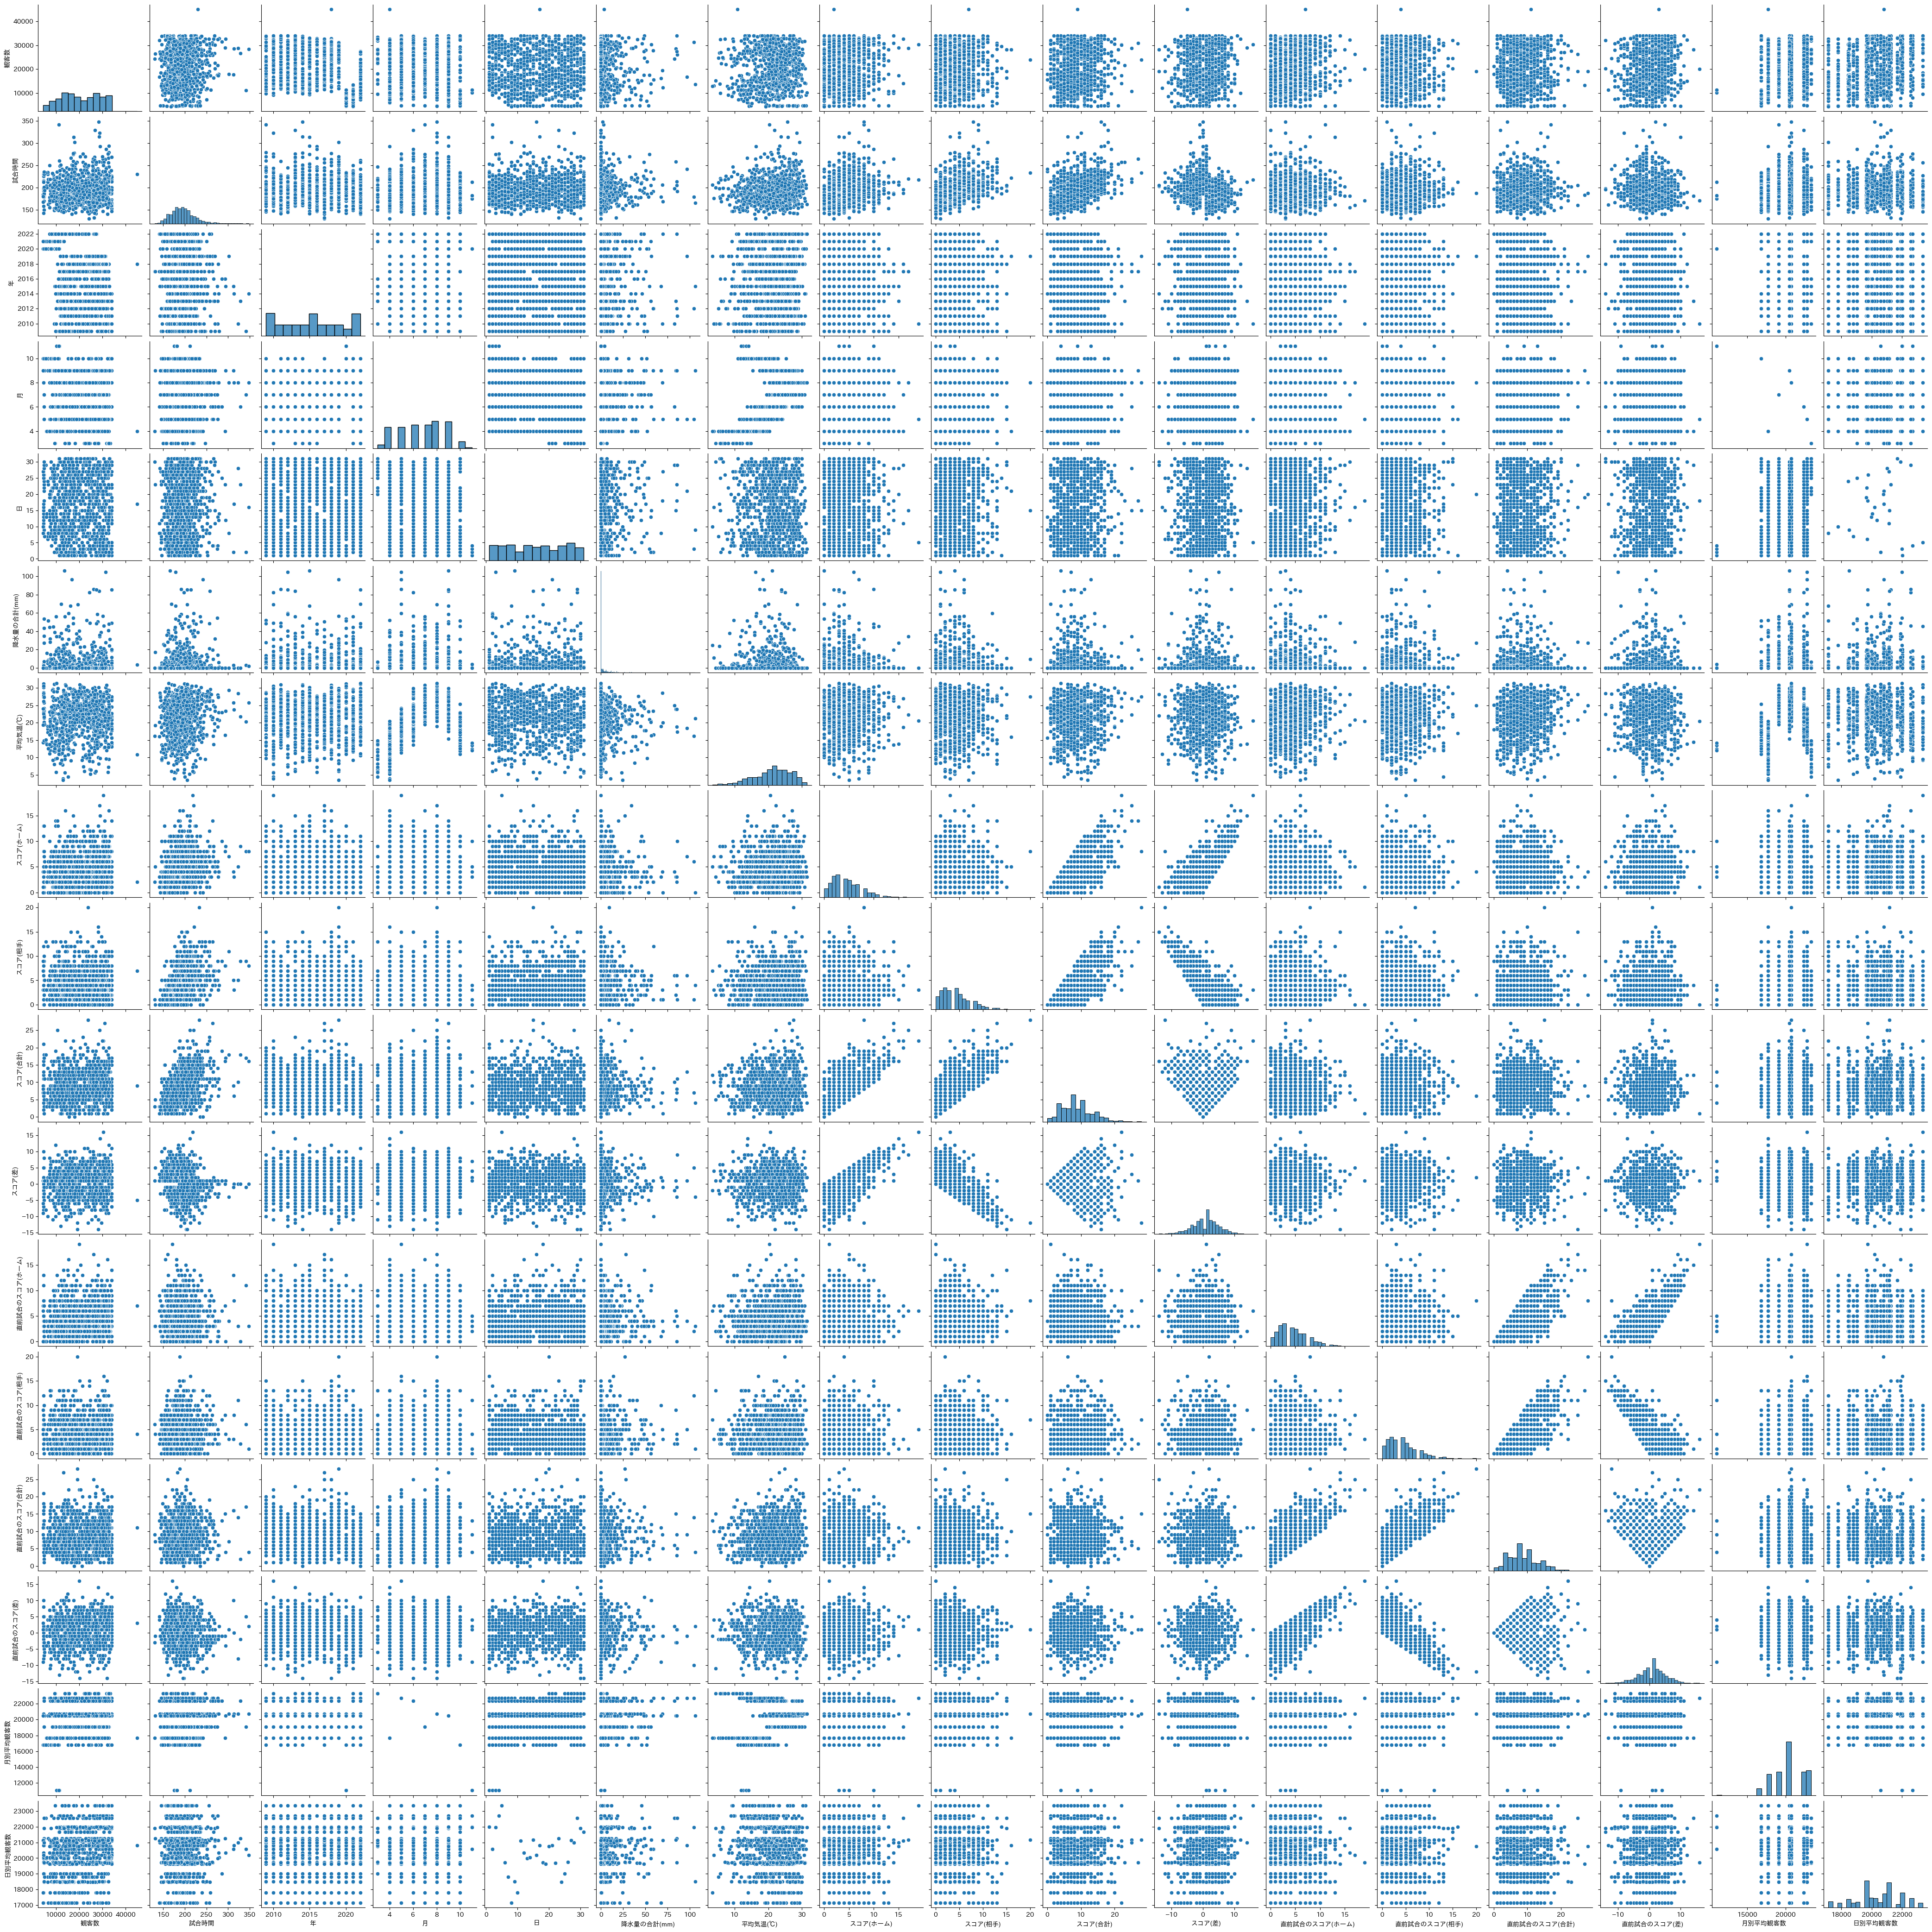

In [52]:
sns.pairplot(df_plot, diag_kind='hist')

#### 訓練データとテストデータへの分割

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df.loc[:, df.columns != '観客数']
X

試合時間     年   月   日  降水量の合計(mm)  平均気温(℃)  スコア(ホーム)  スコア(相手)  \
年月日                                                                     
2009/4/7    196  2009   4   7         0.0     14.2         8        3   
2009/4/8    185  2009   4   8         0.0     14.1         2       10   
2009/4/9    177  2009   4   9         0.0     16.5        13        6   
2009/4/17   200  2009   4  17         5.0     10.8         2        4   
2009/4/18   204  2009   4  18         0.0     13.6         4        6   
...         ...   ...  ..  ..         ...      ...       ...      ...   
2022/9/19   257  2022   9  19        48.5     26.1         4        6   
2022/9/20   172  2022   9  20        15.5     22.3         4        1   
2022/9/27   168  2022   9  27         0.0     22.6         4        1   
2022/10/1   225  2022  10   1         0.0     21.8         3        1   
2022/10/2   188  2022  10   2         0.0     21.6         2        4   

           スコア(合計)  スコア(差)  直前試合のスコア(ホーム)  直前試合のスコア(相手)  直前試合のスコア(合計)  \
年月日                                                                     
2009/4/7        11       5              3             2             7   
2009/4/8        12      -8              8             3            11   
2009/4/9        19       7              2            10            12   
2009/4/17        6      -2             13             6            19   
2009/4/18       10      -2              2             4             6   
...            ...     ...            ...           ...           ...   
2022/9/19       10      -2              3             4             7   
2022/9/20        5       3              4             6            10   
2022/9/27        5       3              4             1             5   
2022/10/1        4       2              4             1             5   
2022/10/2        6      -2              3             1             4   

           直前試合のスコア(差)   月別平均観客数   日別平均観客数  勝敗_○  勝敗_●  直前試合の勝敗_○  直前試合の勝敗_●  \
年月日                                                                            
2009/4/7             1  17693.64  18786.29     1     0          0          0   
2009/4/8             5  17693.64  17143.54     0     1          1          0   
2009/4/9            -8  17693.64  18510.93     1     0          0          1   
2009/4/17            7  17693.64  20806.97     0     1          1          0   
2009/4/18           -2  17693.64  19713.64     0     1          0          1   
...                ...       ...       ...   ...   ...        ...        ...   
2022/9/19           -1  20473.55  19628.91     0     1          0          1   
2022/9/20           -2  20473.55  20765.17     1     0          0          1   
2022/9/27            3  20473.55  21138.49     1     0          1          0   
2022/10/1            3  16821.42  22001.45     1     0          1          0   
2022/10/2            2  16821.42  20570.03     0     1          1          0   

           対戦相手_オリックス  対戦相手_ソフトバンク  対戦相手_ヤクルト  対戦相手_ロッテ  対戦相手_中日  対戦相手_巨人  \
年月日                                                                         
2009/4/7            1            0          0         0        0        0   
2009/4/8            1            0          0         0        0        0   
2009/4/9            1            0          0         0        0        0   
2009/4/17           0            0          0         0        0        0   
2009/4/18           0            0          0         0        0        0   
...               ...          ...        ...       ...      ...      ...   
2022/9/19           0            0          0         0        0        0   
2022/9/20           0            0          0         0        0        0   
2022/9/27           0            1          0         0        0        0   
2022/10/1           0            1          0         0        0        0   
2022/10/2           0            0          0         0        0        0   

           対戦相手_広島  対戦相手_日本ハム  対戦相手_楽天  対戦相手_阪神  先発投手_今井  先発投手_十亀  先

In [55]:
y = df['観客数']
y

年月日
2009/4/7     24011
2009/4/8     10001
2009/4/9      9813
2009/4/17    15181
2009/4/18    28525
             ...  
2022/9/19    27475
2022/9/20    14063
2022/9/27    24030
2022/10/1    27313
2022/10/2    27259
Name: 観客数, Length: 978, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [57]:
print (X.shape, X_train.shape, X_test.shape)
print (y.shape, y_train.shape, y_test.shape)

(978, 54) (733, 54) (245, 54)
(978,) (733,) (245,)


In [58]:
X_train

試合時間     年   月   日  降水量の合計(mm)  平均気温(℃)  スコア(ホーム)  スコア(相手)  \
年月日                                                                     
2015/7/25   222  2015   7  25         0.0     28.7         4        6   
2013/10/8   196  2013  10   8         0.0     23.0        10        2   
2017/9/9    160  2017   9   9         0.0     23.4         0        1   
2017/9/8    168  2017   9   8         0.0     23.5         2        9   
2015/6/25   201  2015   6  25         6.0     22.5         6        9   
...         ...   ...  ..  ..         ...      ...       ...      ...   
2010/6/19   173  2010   6  19         8.0     23.6         5        1   
2012/9/1    162  2012   9   1        20.0     24.5         4        2   
2021/5/30   235  2021   5  30         7.0     20.2         8        9   
2015/4/3    189  2015   4   3         0.0     15.2         3        7   
2010/6/10   205  2010   6  10         1.0     21.4         4        8   

           スコア(合計)  スコア(差)  直前試合のスコア(ホーム)  直前試合のスコア(相手)  直前試合のスコア(合計)  \
年月日                                                                     
2015/7/25       10      -2              6            13            19   
2013/10/8       12       8              5             4             9   
2017/9/9         1      -1              2             9            11   
2017/9/8        11      -7              3             0             3   
2015/6/25       15      -3              7             4            11   
...            ...     ...            ...           ...           ...   
2010/6/19        6       4              8             1             9   
2012/9/1         6       2              5             3             8   
2021/5/30       17      -1              1             0             1   
2015/4/3        10      -4              5             4             9   
2010/6/10       12      -4              2             1             3   

           直前試合のスコア(差)   月別平均観客数   日別平均観客数  勝敗_○  勝敗_●  直前試合の勝敗_○  直前試合の勝敗_●  \
年月日                                                                            
2015/7/25           -7  19106.44  19019.58     0     1          0          1   
2013/10/8            1  16821.42  17143.54     1     0          1          0   
2017/9/9            -7  20473.55  18510.93     0     1          0          1   
2017/9/8             3  20473.55  17143.54     0     1          1          0   
2015/6/25            3  22359.40  19019.58     0     1          1          0   
...                ...       ...       ...   ...   ...        ...        ...   
2010/6/19            7  22359.40  19628.91     1     0          1          0   
2012/9/1             2  20473.55  22001.45     1     0          1          0   
2021/5/30            1  22741.88  21898.10     0     1          1          0   
2015/4/3             1  17693.64  21970.81     0     1          1          0   
2010/6/10            1  22359.40  17777.52     0     1          1          0   

           対戦相手_オリックス  対戦相手_ソフトバンク  対戦相手_ヤクルト  対戦相手_ロッテ  対戦相手_中日  対戦相手_巨人  \
年月日                                                                         
2015/7/25           0            0          0         0        0        0   
2013/10/8           0            0          0         1        0        0   
2017/9/9            0            0          0         0        0        0   
2017/9/8            0            0          0         0        0        0   
2015/6/25           0            1          0         0        0        0   
...               ...          ...        ...       ...      ...      ...   
2010/6/19           0            1          0         0        0        0   
2012/9/1            0            0          0         1        0        0   
2021/5/30           0            0          0         0        0        0   
2015/4/3            0            1          0         0        0        0   
2010/6/10           0            0          0         0        0        0   

           対戦相手_広島  対戦相手_日本ハム  対戦相手_楽天  対戦相手_阪神  先発投手_今井  先発投手_十亀  先

In [59]:
y_train

年月日
2015/7/25    30996
2013/10/8    32258
2017/9/9     30439
2017/9/8     26450
2015/6/25    13481
             ...  
2010/6/19    26845
2012/9/1     33916
2021/5/30     4763
2015/4/3     13176
2010/6/10    28892
Name: 観客数, Length: 733, dtype: int64

#### 標準化

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
ss_x = StandardScaler()
X_train_scaled = ss_x.fit_transform(X_train)
X_test_scaled = ss_x.transform(X_test)

In [62]:
X_train_df = pd.DataFrame(X_train_scaled)
X_train_df.index = X_train.index
X_train_df.columns = X_train.columns
X_train_df

試合時間         年         月         日  降水量の合計(mm)   平均気温(℃)  \
年月日                                                                       
2015/7/25  0.836901 -0.090935  0.138168  1.003219   -0.407780  1.369421   
2013/10/8 -0.035189 -0.592101  1.754295 -0.881465   -0.407780  0.306128   
2017/9/9  -1.242699  0.410232  1.215586 -0.770601   -0.407780  0.380745   
2017/9/8  -0.974363  0.410232  1.215586 -0.881465   -0.407780  0.399400   
2015/6/25  0.132520 -0.090935 -0.400541  1.003219    0.070975  0.212857   
...             ...       ...       ...       ...         ...       ...   
2010/6/19 -0.806654 -1.343851 -0.400541  0.338036    0.230560  0.418054   
2012/9/1  -1.175615 -0.842684  1.215586 -1.657512    1.188071  0.585942   
2021/5/30  1.272946  1.412565 -0.939249  1.557538    0.150768 -0.216191   
2015/4/3  -0.269983 -0.090935 -1.477958 -1.435784   -0.407780 -1.148904   
2010/6/10  0.266688 -1.343851 -0.400541 -0.659738   -0.327988  0.007660   

           スコア(ホーム)   スコア(相手)   スコア(合計)    スコア(差)  直前試合のスコア(ホーム)  \
年月日                                                                
2015/7/25 -0.187594  0.548886  0.255669 -0.533060       0.476171   
2013/10/8  1.744583 -0.715320  0.698708  1.765368       0.157128   
2017/9/9  -1.475713 -1.031371 -1.738006 -0.303217      -0.800002   
2017/9/8  -0.831654  1.497040  0.477189 -1.682273      -0.480958   
2015/6/25  0.456465  1.497040  1.363266 -0.762902       0.795214   
...             ...       ...       ...       ...            ...   
2010/6/19  0.134435 -1.031371 -0.630409  0.845997       1.114257   
2012/9/1  -0.187594 -0.715320 -0.630409  0.386311       0.157128   
2021/5/30  1.100524  1.497040  1.806305 -0.303217      -1.119045   
2015/4/3  -0.509624  0.864937  0.255669 -0.992745       0.157128   
2010/6/10 -0.187594  1.180989  0.698708 -0.992745      -0.800002   

           直前試合のスコア(相手)  直前試合のスコア(合計)  直前試合のスコア(差)   月別平均観客数   日別平均観客数  \
年月日                                                                      
2015/7/25      2.731931      2.236751    -1.650334 -0.680001 -1.015221   
2013/10/8     -0.088058      0.045733     0.176655 -1.871345 -2.332973   
2017/9/9       1.478603      0.483937    -1.650334  0.032771 -1.372502   
2017/9/8      -1.341386     -1.268877     0.633402  0.032771 -2.332973   
2015/6/25     -0.088058      0.483937     0.633402  1.016000 -1.015221   
...                 ...           ...          ...       ...       ...   
2010/6/19     -1.028054      0.045733     1.546896  1.016000 -0.587220   
2012/9/1      -0.401390     -0.173368     0.405028  0.032771  1.079280   
2021/5/30     -1.341386     -1.707080     0.176655  1.215414  1.006685   
2015/4/3      -0.088058      0.045733     0.176655 -1.416595  1.057758   
2010/6/10     -1.028054     -1.268877     0.176655  1.016000 -1.887658   

               勝敗_○      勝敗_●  直前試合の勝敗_○  直前試合の勝敗_●  対戦相手_オリックス  対戦相手_ソフトバンク  \
年月日                                                                            
2015/7/25 -1.108135  1.194635  -1.081036   1.155160    -0.44024    -0.449043   
2013/10/8  0.902417 -0.837076   0.925038  -0.865681    -0.44024    -0.449043   
2017/9/9  -1.108135  1.194635  -1.081036   1.155160    -0.44024    -0.449043   
2017/9/8  -1.108135  1.194635   0.925038  -0.865681    -0.44024    -0.449043   
2015/6/25 -1.108135  1.194635   0.925038  -0.865681    -0.44024     2.226960   
...             ...       ...        ...        ...         ...          ...   
2010/6/19  0.902417 -0.837076   0.925038  -0.865681    -0.44024     2.226960   
2012/9/1   0.902417 -0.837076   0.925038  -0.865681    -0.44024    -0.449043   
2021/5/30 -1.108135  1.194635   0.925038  -0.865681    -0.44024    -0.449043   
2015/4/3  -1.108135  1.194635   0.925038  -0.865681    -0.44024     2.226960   
2010/6/10 -1.108135  1.194635   0.925038  -0.865681    -0.44024    -0.449043   

           対戦相手_ヤクルト  対戦相手_ロッテ   対戦相手_中日   対戦相手_巨人   対戦相手_広島  対戦相手_日本ハム  \
年月日                                                                       


In [63]:
ss_y = StandardScaler()
y_train_scaled = ss_y.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_scaled = ss_y.transform(y_test.to_numpy().reshape(-1, 1))

#### 線形重回帰をbase modelとして訓練、評価

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [67]:
def plot_features(series_features, y_limit=(-1, 1), y_label='係数'):
    print(series_features)
    plt.figure(figsize=(15, 3))
    plt.bar(np.arange(len(series_features)), series_features, tick_label=series_features.index, width=0.6)
    plt.xticks(rotation=90)
    plt.ylim(*y_limit)
    plt.ylabel(y_label, size=20)
    plt.show()

In [68]:
def plot_result(y_train, y_train_pred, y_test, y_test_pred, label='テスト'): 
    plt.figure(figsize=(16, 6))
    plt.subplot(121)
    plt.scatter(y_train, y_train_pred)
    plt.xlabel('正解観客数', size=20)
    plt.ylabel('予想観客数', size=20)
    plt.title(f'訓練データ, R$^2$={round(r2_score(y_train, y_train_pred), 3)}')
    plt.subplot(122)
    plt.scatter(y_test, y_test_pred)
    plt.xlabel('正解観客数', size=20)
    plt.ylabel('予想観客数', size=20)
    plt.title(f'{label}データ, R$^2$={round(r2_score(y_test, y_test_pred), 3)}')
    plt.show()

試合時間             3.103016e-02
年               -3.306978e-01
月               -3.117158e-03
日               -1.010416e-01
降水量の合計(mm)      -1.664939e-02
平均気温(℃)          2.318432e-02
スコア(ホーム)        -2.042554e+12
スコア(相手)         -3.576442e+12
スコア(合計)          4.035995e+12
スコア(差)          -1.028043e+12
直前試合のスコア(ホーム)   -1.100834e+12
直前試合のスコア(相手)     1.120898e+12
直前試合のスコア(合計)     2.909785e+00
直前試合のスコア(差)      1.537890e+12
月別平均観客数          1.725932e-01
日別平均観客数          1.426301e-01
勝敗_○             1.738156e-01
勝敗_●             1.571334e-01
直前試合の勝敗_○        1.680372e-01
直前試合の勝敗_●        1.753490e-01
対戦相手_オリックス       4.593954e-02
対戦相手_ソフトバンク      1.027791e-01
対戦相手_ヤクルト        2.093151e-02
対戦相手_ロッテ         9.289512e-02
対戦相手_中日         -2.425107e-02
対戦相手_巨人          1.595807e-01
対戦相手_広島          1.097923e-01
対戦相手_日本ハム        1.263933e-01
対戦相手_楽天          1.327780e-01
対戦相手_阪神          5.883710e-02
先発投手_今井          2.379088e-02
先発投手_十亀          8.521208e-02
先発投手_多和田         1.079046e-01
先発投手_岸    

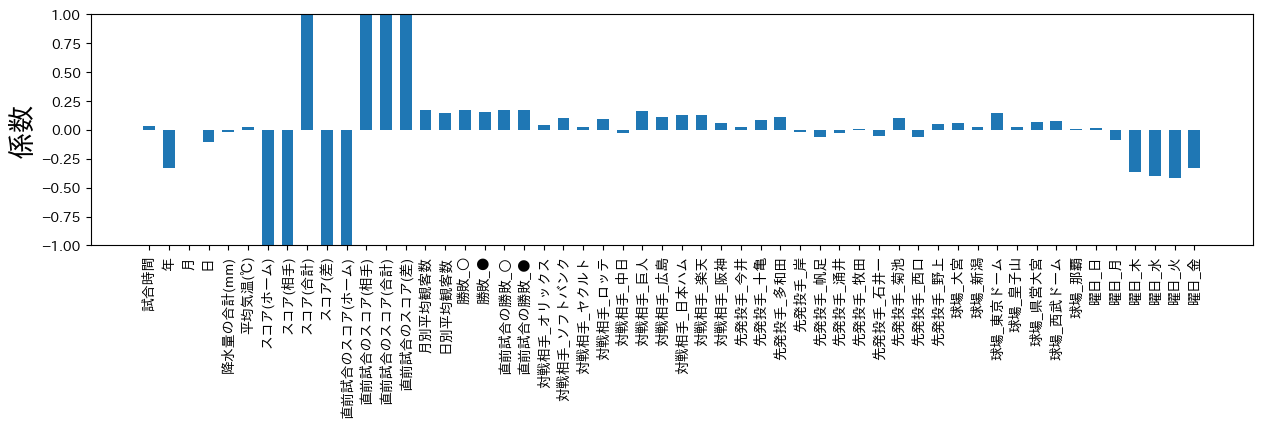

In [69]:
coef = pd.Series(lr.coef_[0], index=X.columns)
plot_features(coef)

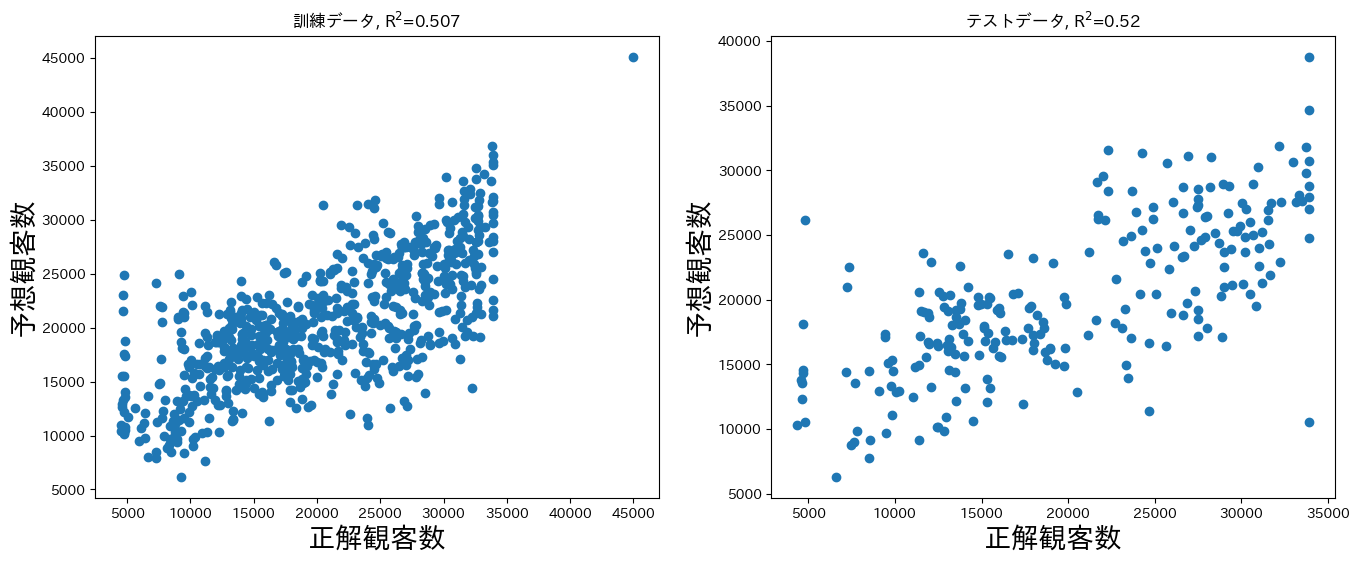

In [70]:
plot_result(y_train, ss_y.inverse_transform(y_train_pred), y_test, ss_y.inverse_transform(y_test_pred))

#### ランダムフォレストによる非線形回帰

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

試合時間             0.030099
年                0.414058
月                0.013646
日                0.029609
降水量の合計(mm)       0.017235
平均気温(℃)          0.053593
スコア(ホーム)         0.013155
スコア(相手)          0.012737
スコア(合計)          0.018499
スコア(差)           0.011855
直前試合のスコア(ホーム)    0.012038
直前試合のスコア(相手)     0.010171
直前試合のスコア(合計)     0.016848
直前試合のスコア(差)      0.013325
月別平均観客数          0.049484
日別平均観客数          0.035750
勝敗_○             0.001118
勝敗_●             0.001338
直前試合の勝敗_○        0.001152
直前試合の勝敗_●        0.000733
対戦相手_オリックス       0.006095
対戦相手_ソフトバンク      0.003408
対戦相手_ヤクルト        0.000285
対戦相手_ロッテ         0.004984
対戦相手_中日          0.000969
対戦相手_巨人          0.001598
対戦相手_広島          0.001482
対戦相手_日本ハム        0.002457
対戦相手_楽天          0.003532
対戦相手_阪神          0.002388
先発投手_今井          0.000711
先発投手_十亀          0.004955
先発投手_多和田         0.001491
先発投手_岸           0.002524
先発投手_帆足          0.002259
先発投手_涌井          0.001100
先発投手_牧田          0.003012
先発投手_石井一         0.001193
先発投手_菊池     

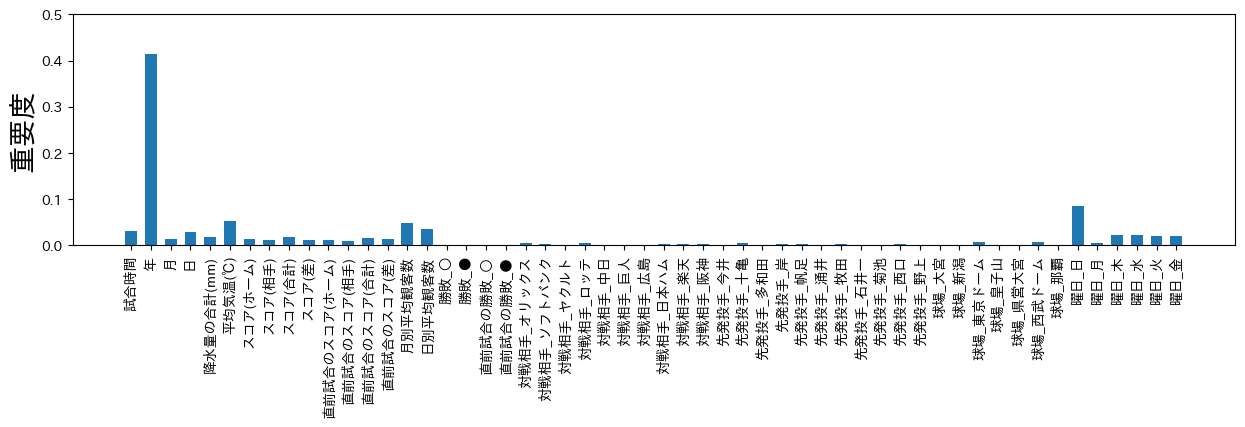

In [73]:
fi = pd.Series(rf.feature_importances_, index=X.columns)
plot_features(fi, y_limit=(0, 0.5), y_label='重要度')

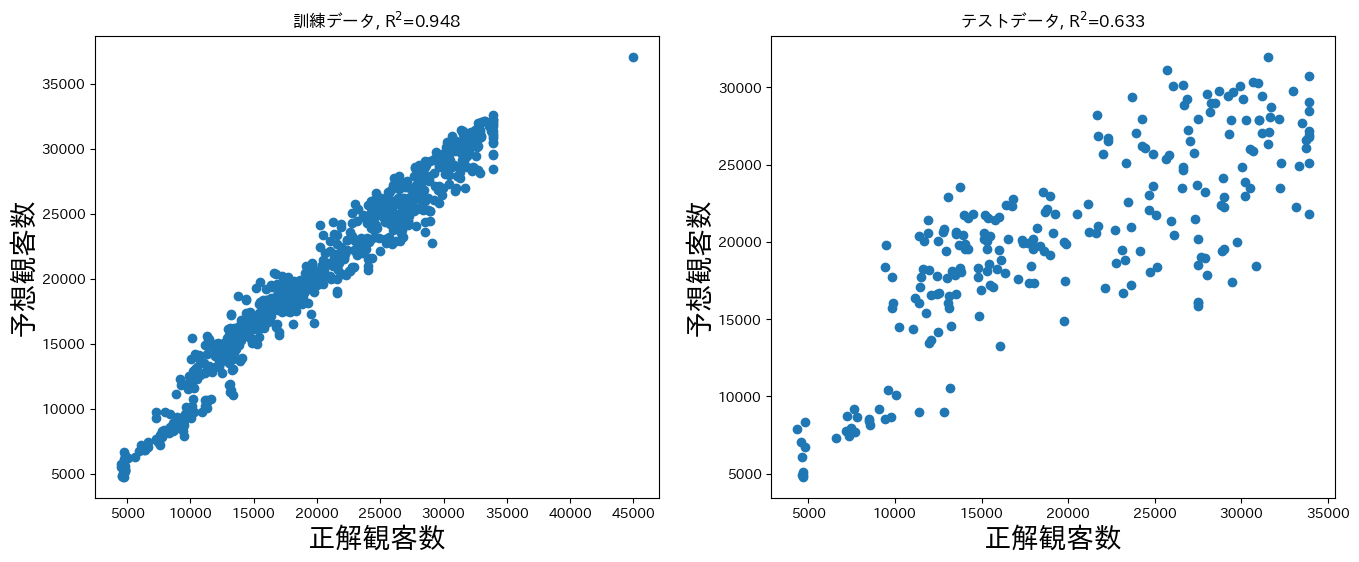

In [74]:
plot_result(y_train, y_train_pred, y_test, y_test_pred)

##### 交差検証(CV)法

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = {'max_depth':[1, 3, 5, 10, 30, 50],
            'n_estimators':[10, 30, 50, 100, 300],
            'max_features':['sqrt', 'log2', None]}

In [77]:
gs = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    refit=True
)
gs.fit(X_train, y_train)
print('Best Score:', gs.best_score_)
print('Best Params', gs.best_params_)

Best Score: 0.6141686139871677
Best Params {'max_depth': 10, 'max_features': None, 'n_estimators': 30}


In [78]:
y_train_pred = gs.predict(X_train)
y_test_pred = gs.predict(X_test)

試合時間             0.025202
年                0.432082
月                0.012241
日                0.024162
降水量の合計(mm)       0.014390
平均気温(℃)          0.048771
スコア(ホーム)         0.012202
スコア(相手)          0.010010
スコア(合計)          0.014841
スコア(差)           0.011646
直前試合のスコア(ホーム)    0.008637
直前試合のスコア(相手)     0.007419
直前試合のスコア(合計)     0.012728
直前試合のスコア(差)      0.015837
月別平均観客数          0.046604
日別平均観客数          0.036136
勝敗_○             0.000750
勝敗_●             0.000316
直前試合の勝敗_○        0.001123
直前試合の勝敗_●        0.001065
対戦相手_オリックス       0.005925
対戦相手_ソフトバンク      0.003114
対戦相手_ヤクルト        0.000372
対戦相手_ロッテ         0.005301
対戦相手_中日          0.000761
対戦相手_巨人          0.001287
対戦相手_広島          0.001231
対戦相手_日本ハム        0.001874
対戦相手_楽天          0.001294
対戦相手_阪神          0.001756
先発投手_今井          0.000734
先発投手_十亀          0.003633
先発投手_多和田         0.002144
先発投手_岸           0.001603
先発投手_帆足          0.001517
先発投手_涌井          0.000443
先発投手_牧田          0.001598
先発投手_石井一         0.002050
先発投手_菊池     

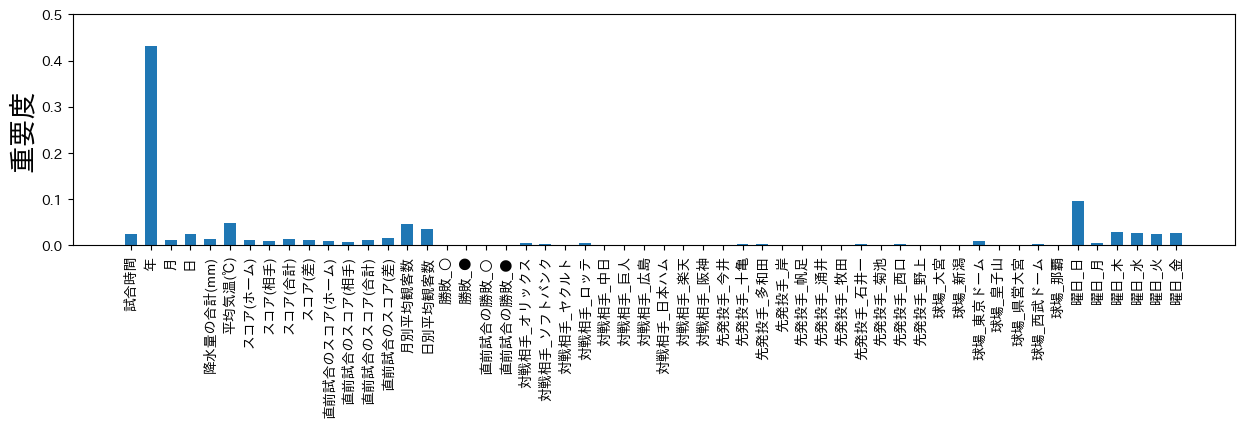

In [79]:
fi = pd.Series(gs.best_estimator_.feature_importances_, index=X.columns)
plot_features(fi, y_limit=(0, 0.5), y_label='重要度')

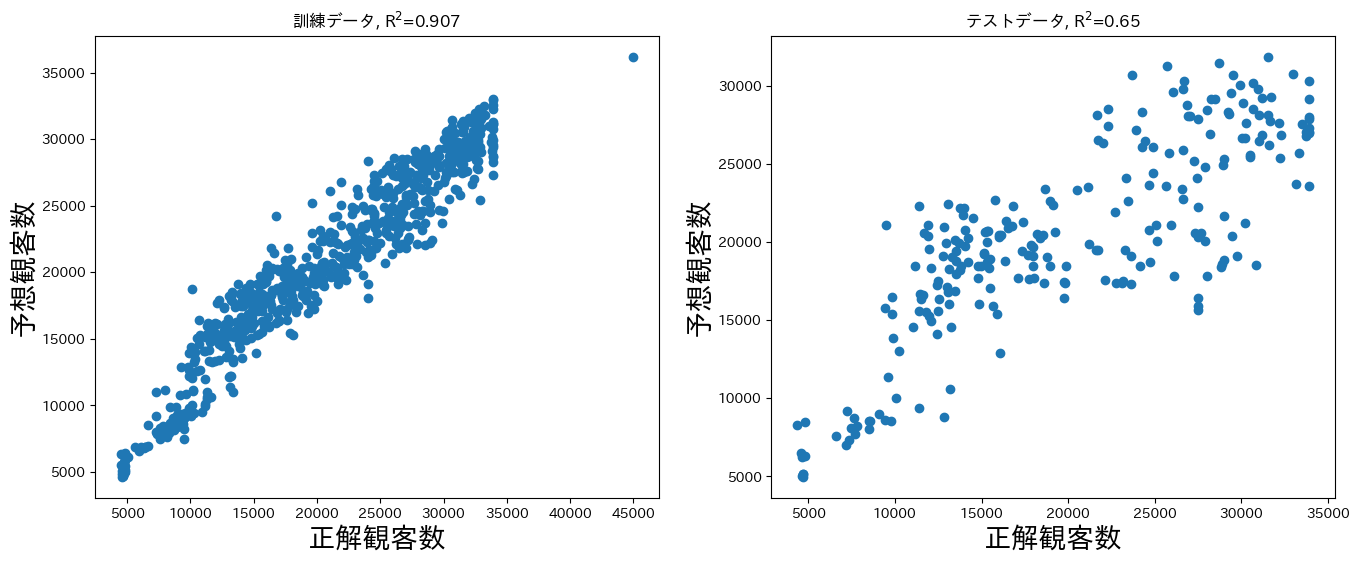

In [80]:
plot_result(y_train, y_train_pred, y_test, y_test_pred)

#### lightgbmによるの学習、評価

In [25]:
# !pip install lightgbm
# !pip install optuna 

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib

# lightgbmのplotを実行すると、styleの設定が変わるので、実行前に変数に保存しておく。
inline_rc = dict(mpl.rcParams)

In [27]:
from sklearn.metrics import r2_score

def plot_result(y_train, y_train_pred, y_test, y_test_pred, label='テスト'): 
    plt.figure(figsize=(16, 6))
    plt.subplot(121)
    plt.scatter(y_train, y_train_pred)
    plt.xlabel('正解観客数', size=20)
    plt.ylabel('予想観客数', size=20)
    plt.title(f'訓練データ, R$^2$={round(r2_score(y_train, y_train_pred), 3)}')
    plt.subplot(122)
    plt.scatter(y_test, y_test_pred)
    plt.xlabel('正解観客数', size=20)
    plt.ylabel('予想観客数', size=20)
    plt.title(f'{label}データ, R$^2$={round(r2_score(y_test, y_test_pred), 3)}')
    plt.show()

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

def load_split_data():
    df = pd.read_csv('data_with_ohe.csv', index_col='年月日')
    X = df.loc[:, df.columns != '観客数']
    y = df['観客数']
    return train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
import optuna
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [30]:
X_train, X_test, y_train, y_test = load_split_data()

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((733, 54), (245, 54), (733,), (245,))

In [32]:
X_train_opt, X_valid_opt, y_train_opt, y_valid_opt = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
X_train_opt.shape, X_valid_opt.shape, y_train_opt.shape, y_valid_opt.shape

((549, 54), (184, 54), (549,), (184,))

In [33]:
def objective(trial):
    param = {
        'metric': 'rmse', 
        'n_estimators': trial.suggest_int('n_estimators', 100, 10000),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'max_depth': trial.suggest_categorical('max_depth', [10, 20, 50, 80, 100]),
        'num_leaves' : trial.suggest_int('num_leaves', 10, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 500)
    }
    lgbm = LGBMRegressor(n_jobs=-1, **param)
    callbacks=[lgb.early_stopping(100, verbose=False), lgb.log_evaluation(period=0)]
    lgbm.fit(X_train_opt, y_train_opt, eval_set=(X_valid_opt, y_valid_opt), callbacks=callbacks)
    y_val_opt_preds = lgbm.predict(X_valid_opt)
    return r2_score(y_valid_opt, y_val_opt_preds)

In [34]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-06-23 15:55:36,709] A new study created in memory with name: no-name-5dd806c0-da11-4ec5-88b8-233ffb48524d
[I 2023-06-23 15:55:36,756] Trial 0 finished with value: -0.005221227671023065 and parameters: {'n_estimators': 891, 'reg_alpha': 8.0132939772241, 'reg_lambda': 5.952691881910911, 'learning_rate': 0.0004020667345623681, 'colsample_bytree': 0.30599693031595643, 'subsample': 0.9303661301909105, 'max_depth': 20, 'num_leaves': 574, 'min_child_samples': 384}. Best is trial 0 with value: -0.005221227671023065.
[I 2023-06-23 15:55:37,846] Trial 1 finished with value: 0.1202391046957928 and parameters: {'n_estimators': 1445, 'reg_alpha': 0.0026564768738495887, 'reg_lambda': 0.007750571172223357, 'learning_rate': 0.004093557798715714, 'colsample_bytree': 0.9030839926172121, 'subsample': 0.5736284690674496, 'max_depth': 20, 'num_leaves': 374, 'min_child_samples': 203}. Best is trial 1 with value: 0.1202391046957928.
[I 2023-06-23 15:55:38,577] Trial 2 finished with value: 0.105327900

In [35]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 100
Best trial: {'n_estimators': 6768, 'reg_alpha': 0.16085407168524093, 'reg_lambda': 0.002348429268929371, 'learning_rate': 0.0034474687367518106, 'colsample_bytree': 0.6619246758006113, 'subsample': 0.7750440355958615, 'max_depth': 10, 'num_leaves': 11, 'min_child_samples': 12}


In [36]:
study.trials_dataframe()

number     value             datetime_start          datetime_complete  \
0        0 -0.005221 2023-06-23 15:55:36.712691 2023-06-23 15:55:36.756283   
1        1  0.120239 2023-06-23 15:55:36.757704 2023-06-23 15:55:37.845777   
2        2  0.105328 2023-06-23 15:55:37.846877 2023-06-23 15:55:38.576733   
3        3  0.058815 2023-06-23 15:55:38.577862 2023-06-23 15:55:40.496234   
4        4  0.105118 2023-06-23 15:55:40.497312 2023-06-23 15:55:41.172541   
..     ...       ...                        ...                        ...   
95      95  0.644238 2023-06-23 16:01:10.620780 2023-06-23 16:01:11.595725   
96      96  0.642541 2023-06-23 16:01:11.596982 2023-06-23 16:01:13.831233   
97      97  0.613479 2023-06-23 16:01:13.832349 2023-06-23 16:01:15.212958   
98      98  0.399262 2023-06-23 16:01:15.214165 2023-06-23 16:01:15.612862   
99      99 -0.005221 2023-06-23 16:01:15.613980 2023-06-23 16:01:15.714012   

                 duration  params_colsample_bytree  params_learning_rate  \
0  0 days 00:00:00.043592                 0.305997              0.000402   
1  0 days 00:00:01.088073                 0.903084              0.004094   
2  0 days 00:00:00.729856                 0.870853              0.003779   
3  0 days 00:00:01.918372                 0.981920              0.000431   
4  0 days 00:00:00.675229                 0.436840              0.005717   
..                    ...                      ...                   ...   
95 0 days 00:00:00.974945                 0.693709              0.004715   
96 0 days 00:00:02.234251                 0.736383              0.002563   
97 0 days 00:00:01.380609                 0.710907              0.006783   
98 0 days 00:00:00.398697                 0.668626              0.003176   
99 0 days 00:00:00.100032                 0.646109              0.003863   

    params_max_depth  params_min_child_samples  params_n_estimators  \
0                 20                       384                  891   
1                 20                       203                 1445   
2                 50                       256                 2885   
3                 20                       242                 4079   
4                 80                       254                 6298   
..               ...                       ...                  ...   
95                20                        33                 5667   
96                20                        61                 5546   
97                50                        14                 6926   
98                80                       101                 5773   
99                20                       448                 7563   

    params_num_leaves  params_reg_alpha  params_reg_lambda  params_subsample  \
0                 574          8.013294           5.952692          0.930366   
1                 374          0.002656           0.007751          0.573628   
2                 591          0.020699           0.057678          0.918742   
3                 306          0.125586           0.024119          0.301403   
4                 899          0.017162           0.029902          0.476577   
..                ...               ...                ...               ...   
95                110          0.135447           0.001880          0.789794   
96                103          0.130852           0.004578          0.785691   
97                 47          0.098220           0.001704          0.798614   
98                 98          0.389475           0.003755          0.820271   
99                 73          0.080185           0.002708          0.840756   

       state  
0   COMPLETE  
1   COMPLETE  
2   COMPLETE  
3   COMPLETE  
4   COMPLETE  
..       ...  
95  COMPLETE  
96  COMPLETE  
97  COMPLETE  
98  COMPLETE  
99  COMPLETE  

[100 rows x 15 columns]

/var/folders/7d/g6cftgkn73xdpn_wddqnr2y80000gn/T/ipykernel_24025/1455980257.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


<AxesSubplot: title={'center': 'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

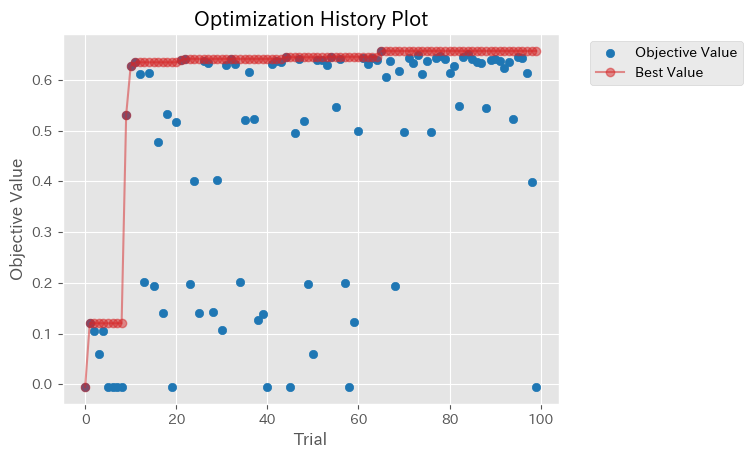

In [37]:
optuna.visualization.matplotlib.plot_optimization_history(study)

/var/folders/7d/g6cftgkn73xdpn_wddqnr2y80000gn/T/ipykernel_24025/1036994904.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


<AxesSubplot: title={'center': 'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

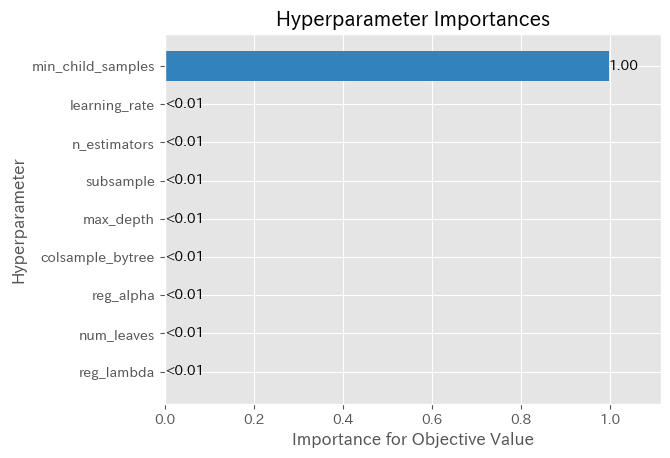

In [38]:
optuna.visualization.matplotlib.plot_param_importances(study)

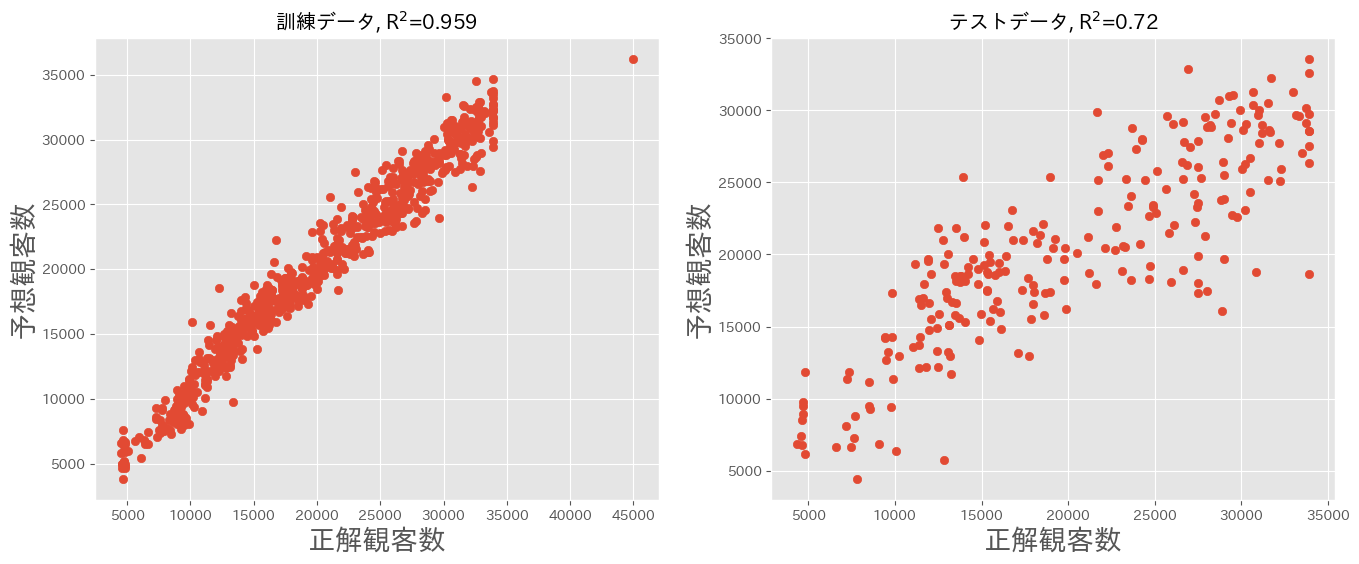

In [39]:
lgbm = LGBMRegressor(**study.best_params)
lgbm.fit(X_train, y_train)
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)
plot_result(y_train, y_train_pred, y_test, y_test_pred)

In [49]:
lgbm.importance_type

'split'

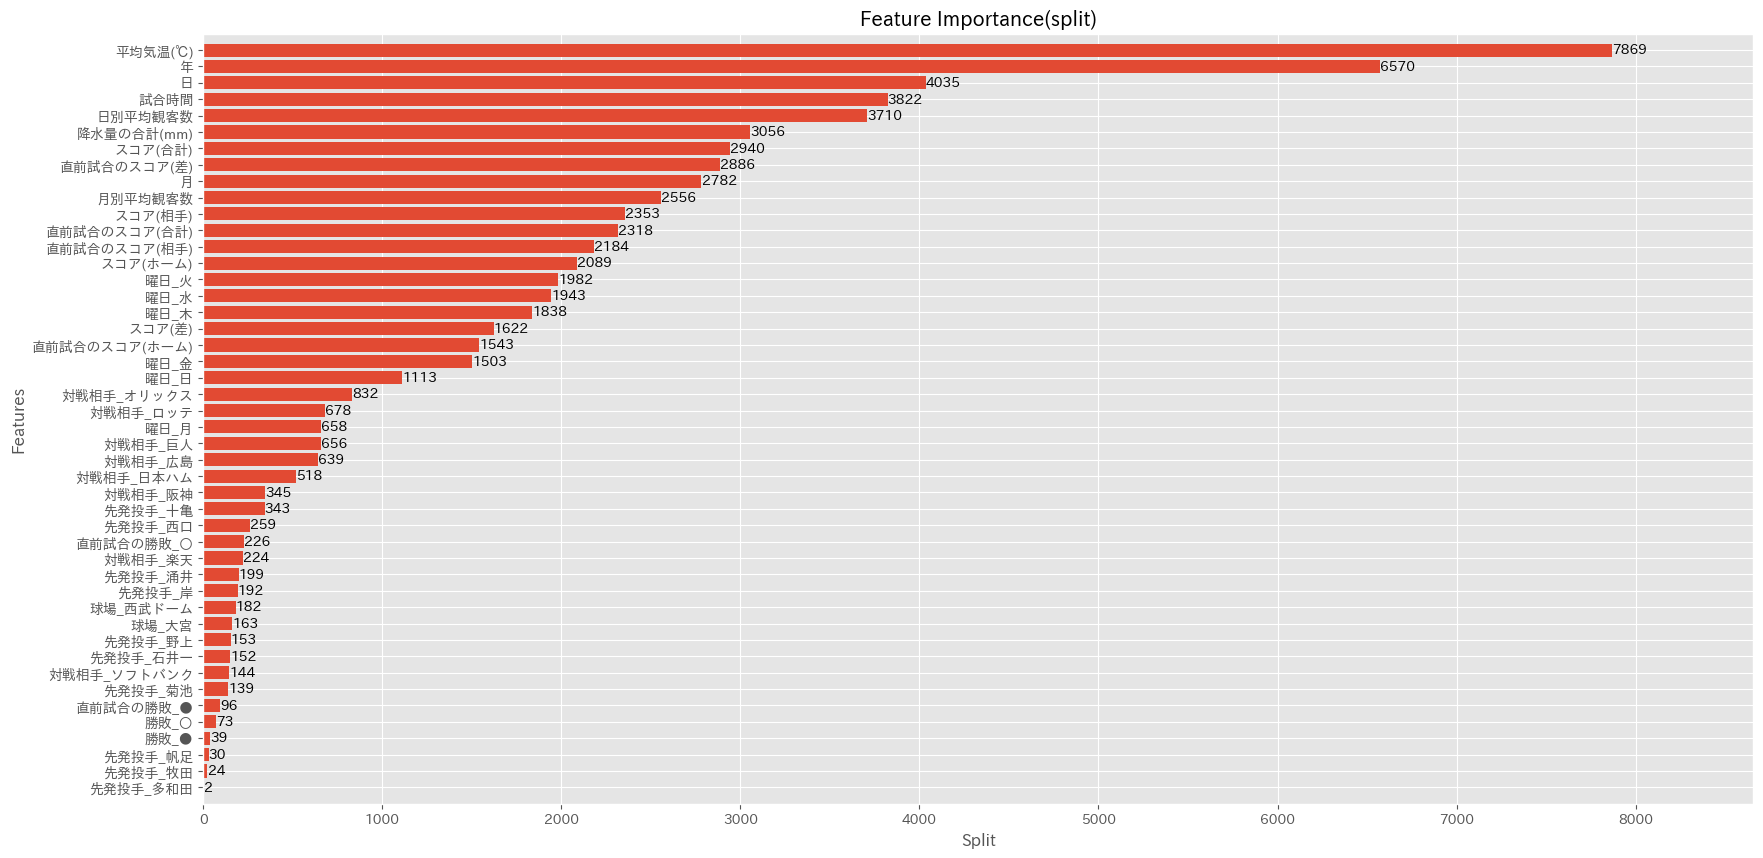

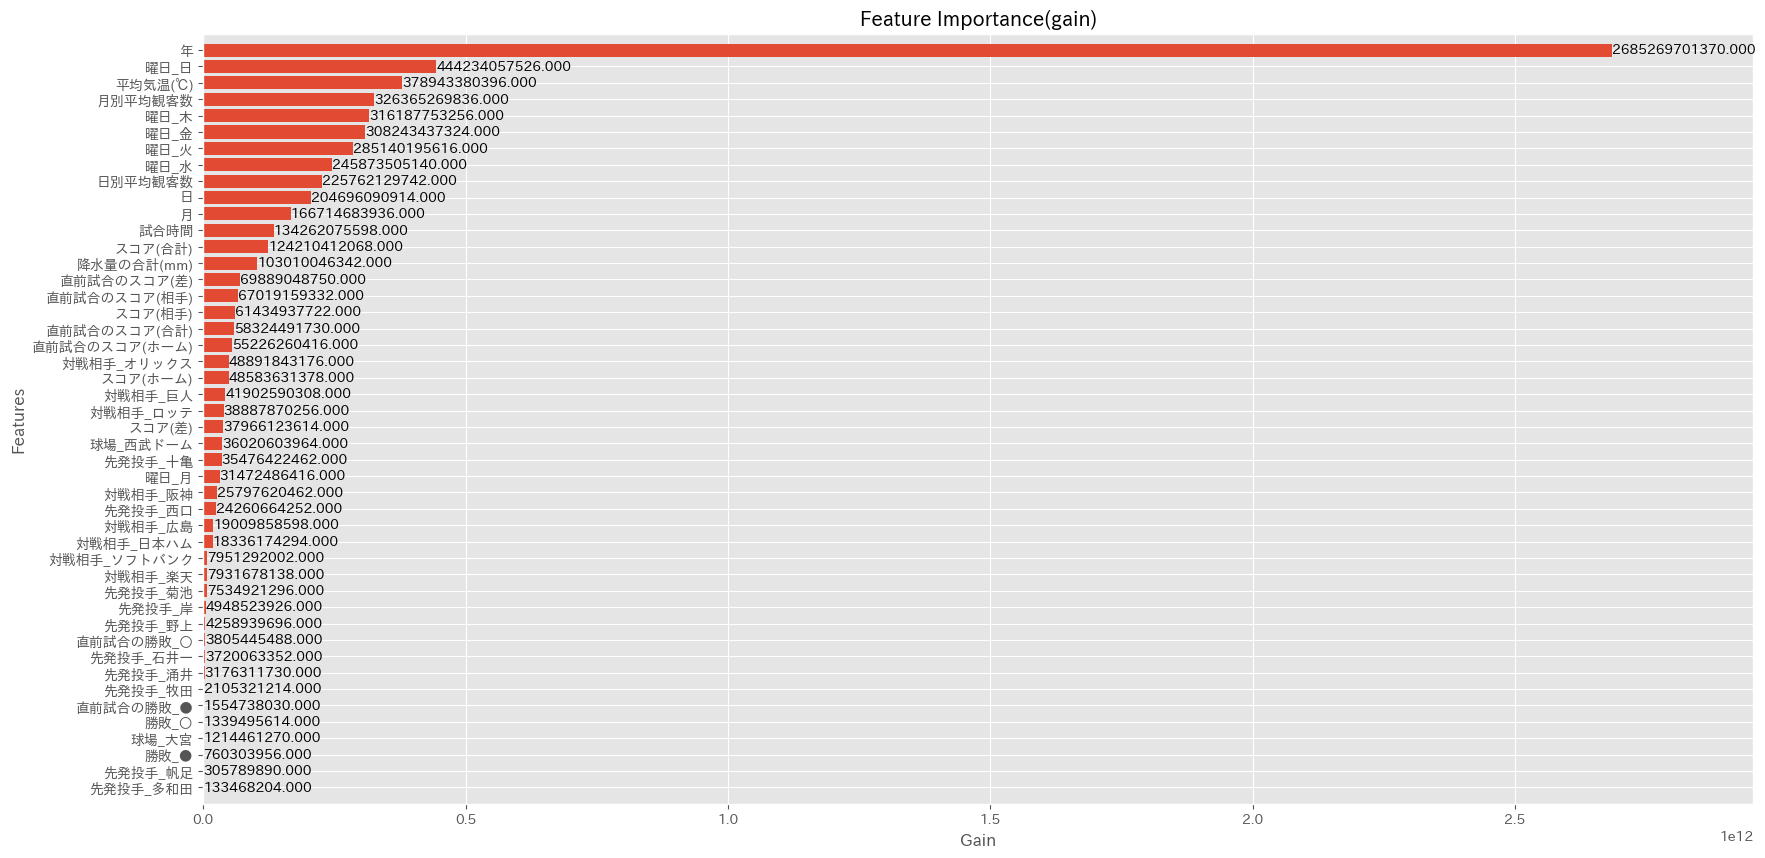

In [50]:
# split: result contains numbers of times the feature is used to split the data across all trees.
# gain: result contains the average training loss reduction gained when using a feature for splitting.
for type_ in ['split', 'gain']:
    lgb.plot_importance(lgbm, xlabel=type_.capitalize(), importance_type=type_, title=f'Feature Importance({type_})', figsize=(20, 10), height=.8)

In [51]:
import joblib

joblib.dump(lgbm, 'lgbm.pkl')

['lgbm.pkl']

In [52]:
# styleをもとの設定に戻す。
mpl.rcParams.update(inline_rc)

#### shapを利用して、重要指標を理解する。

In [55]:
import shap

explainer = shap.Explainer(lgbm)
shap_values = explainer(X_test)

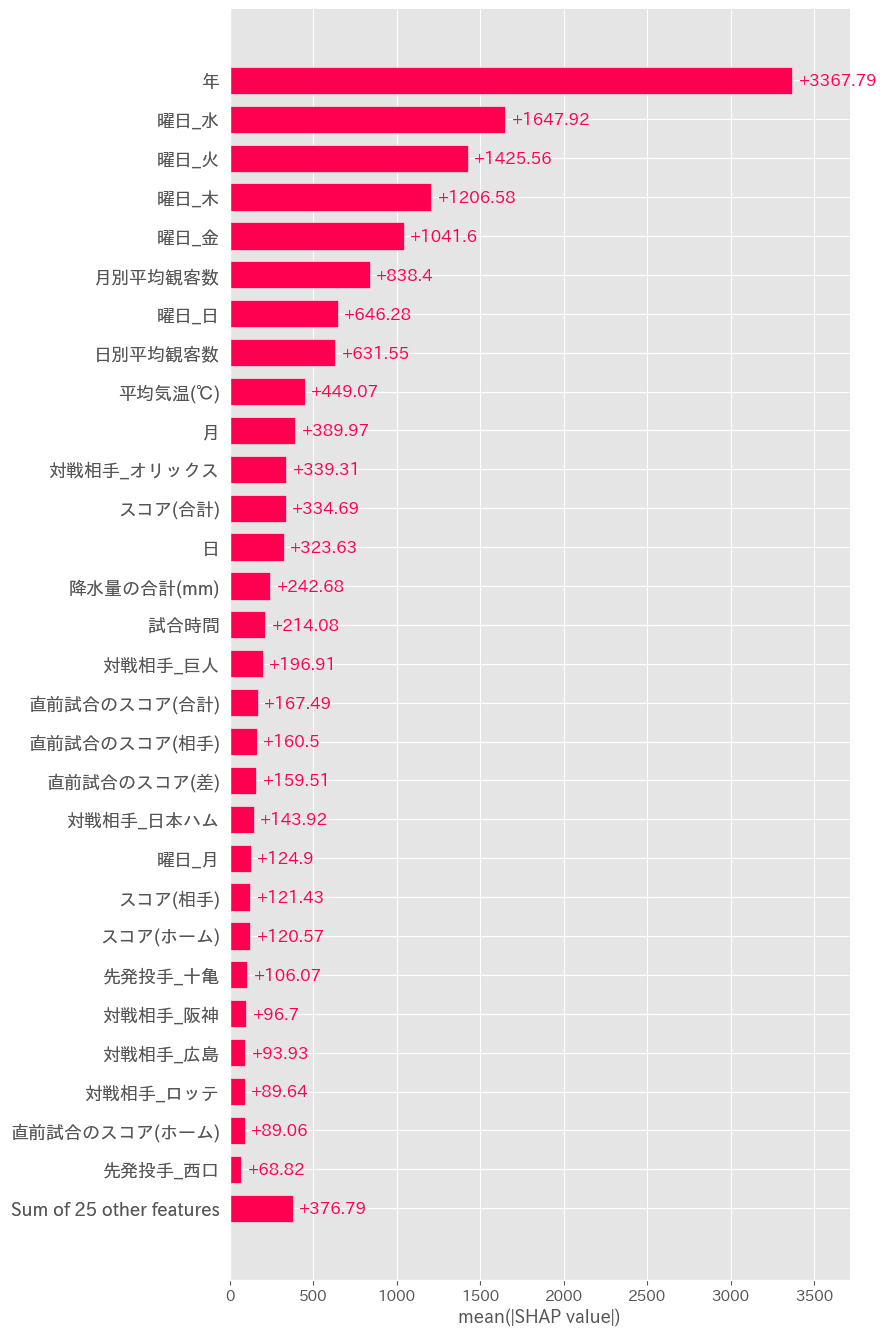

In [90]:
shap.plots.bar(shap_values, max_display=30)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


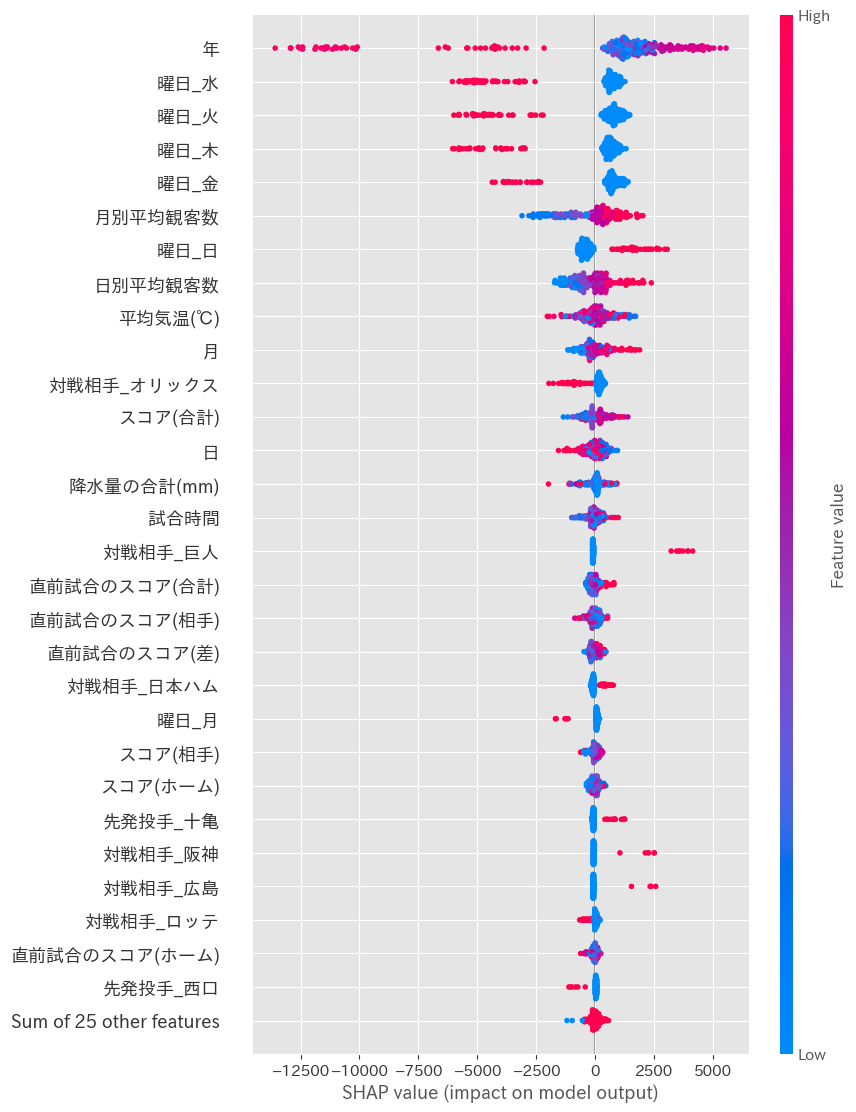

In [56]:
shap.plots.beeswarm(shap_values, max_display=30)

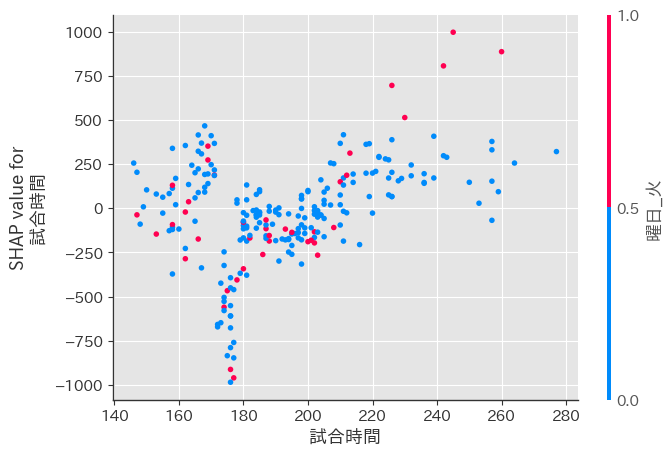

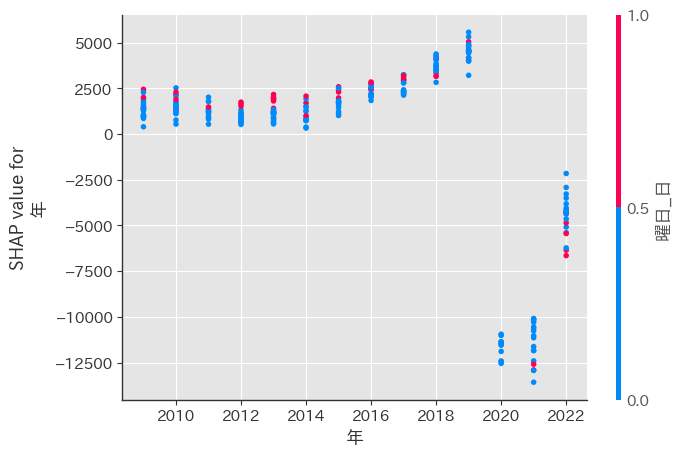

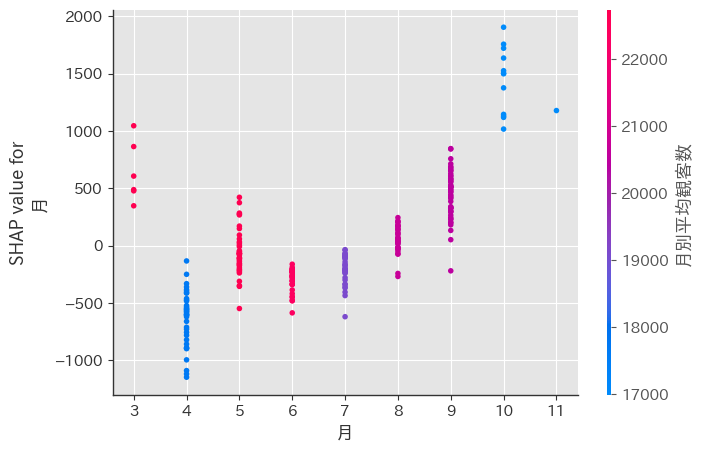

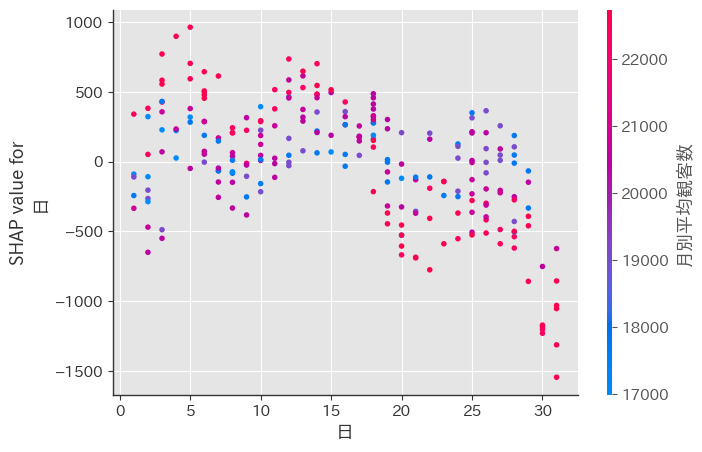

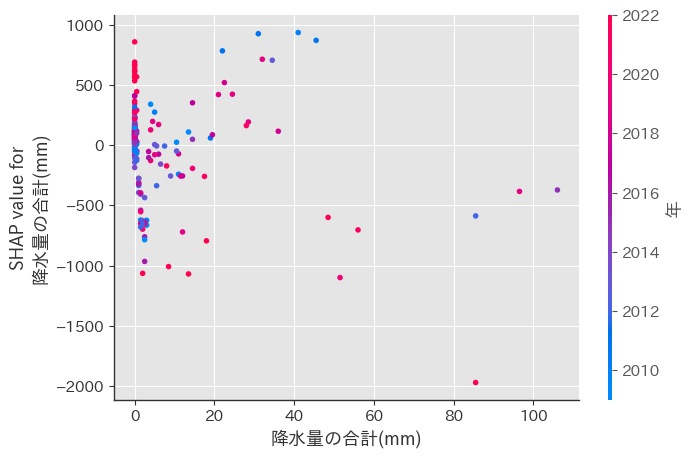

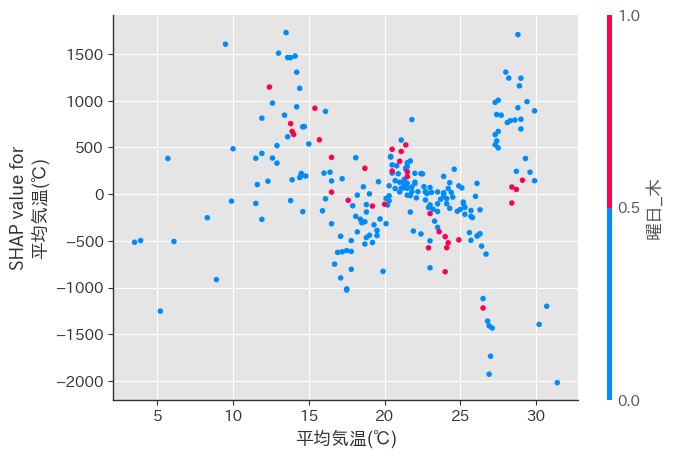

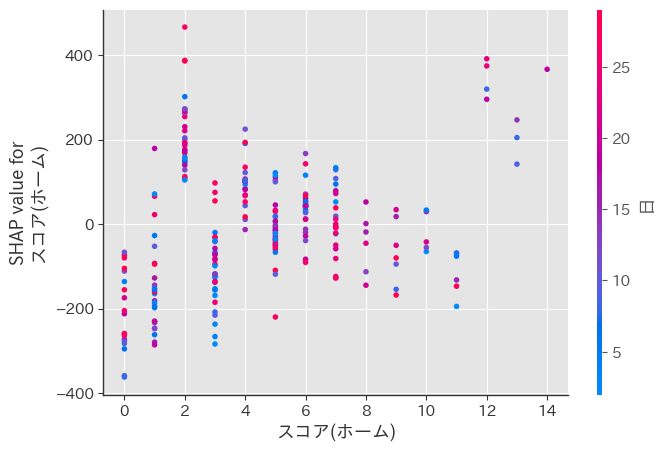

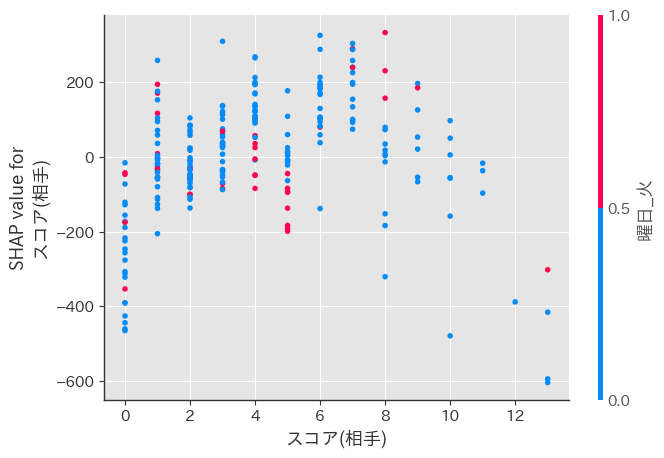

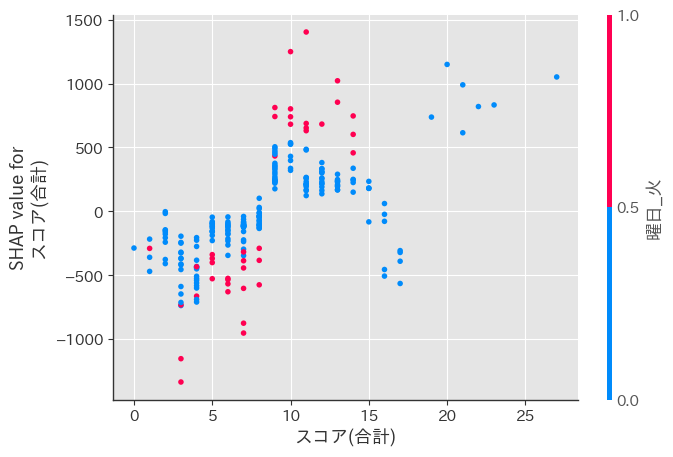

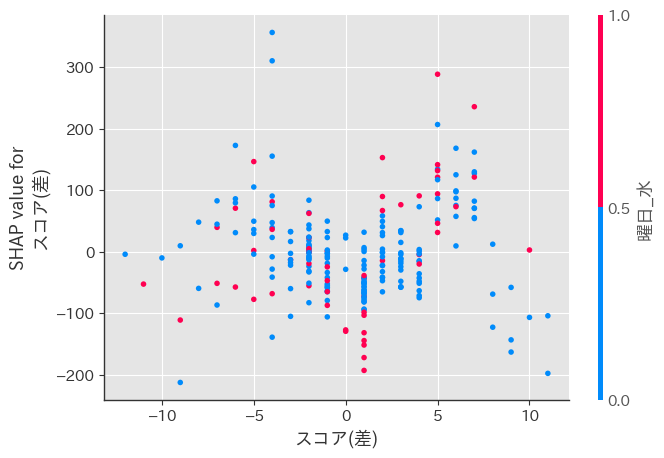

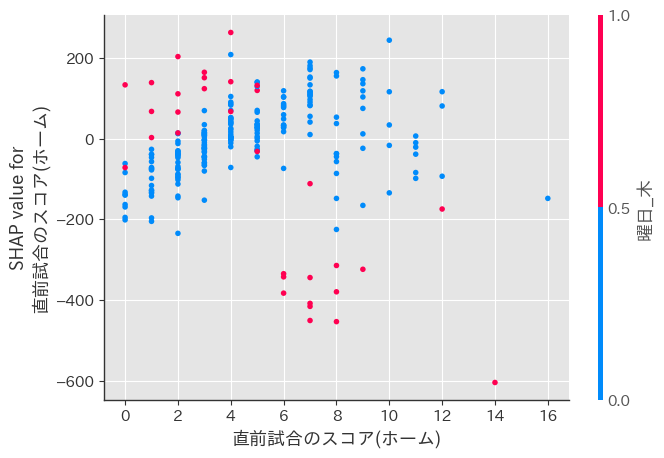

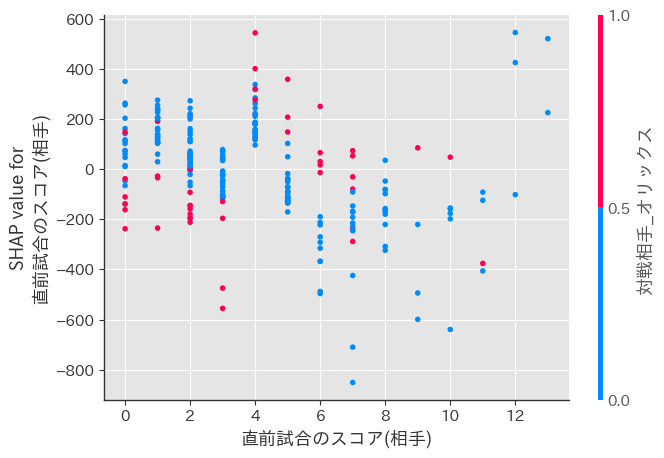

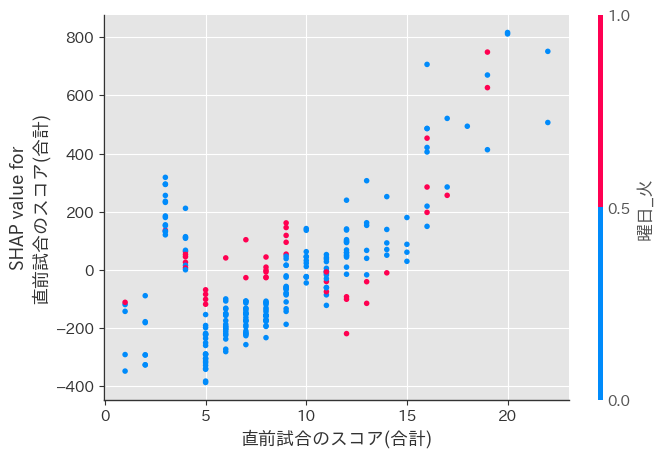

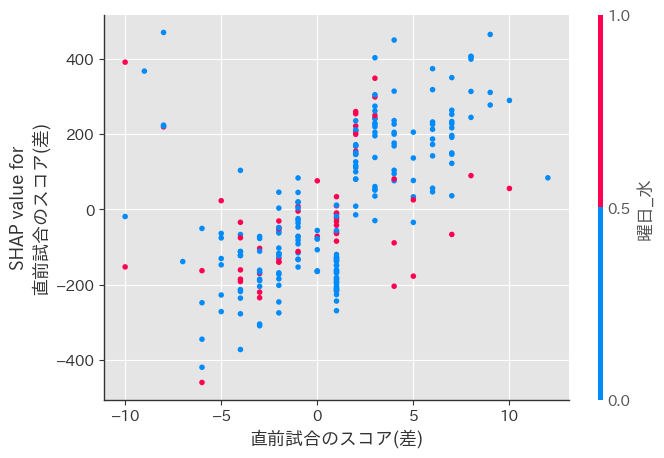

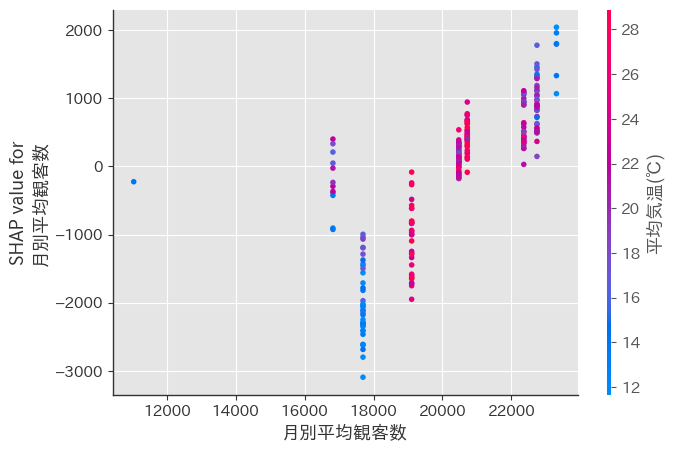

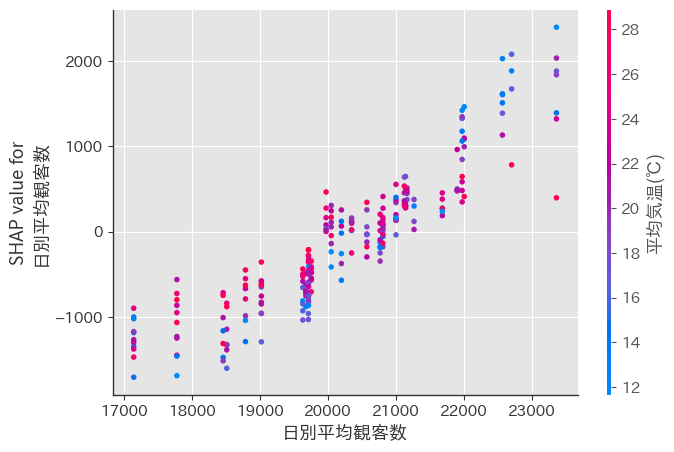

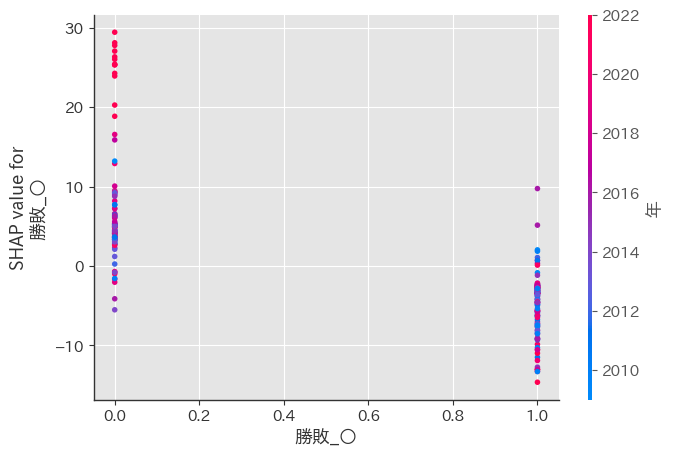

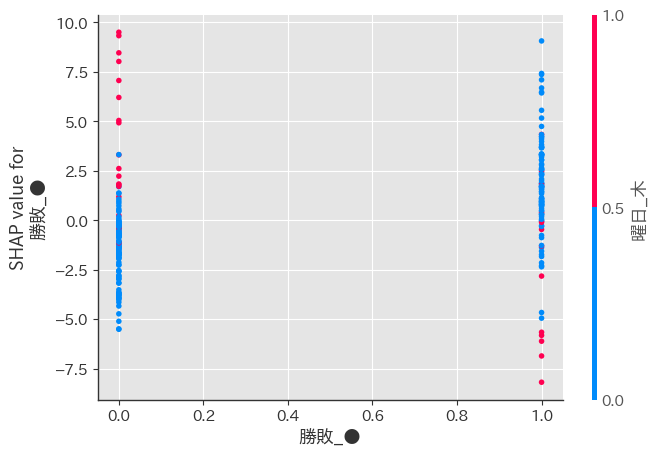

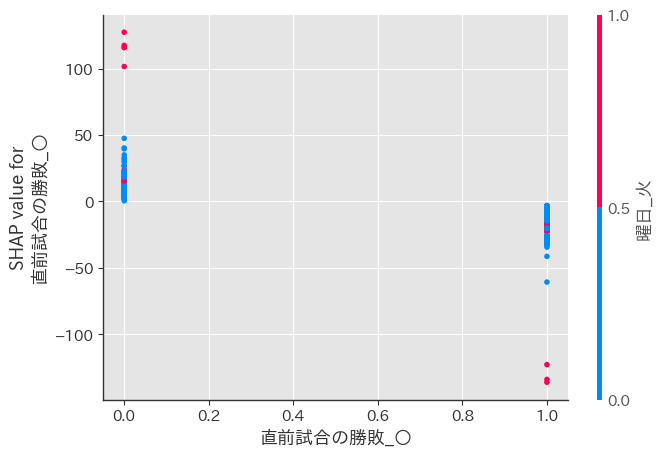

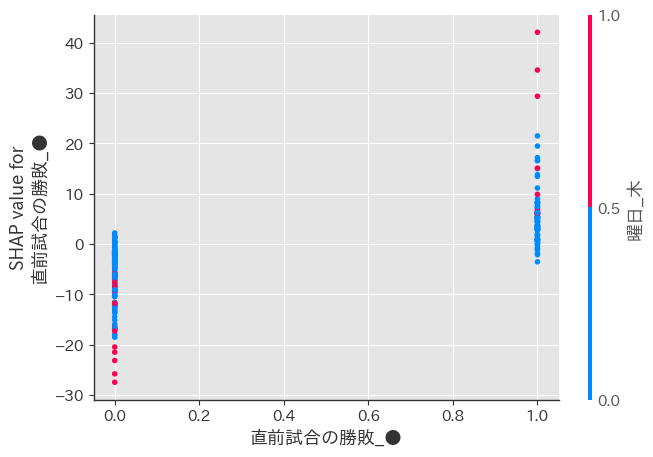

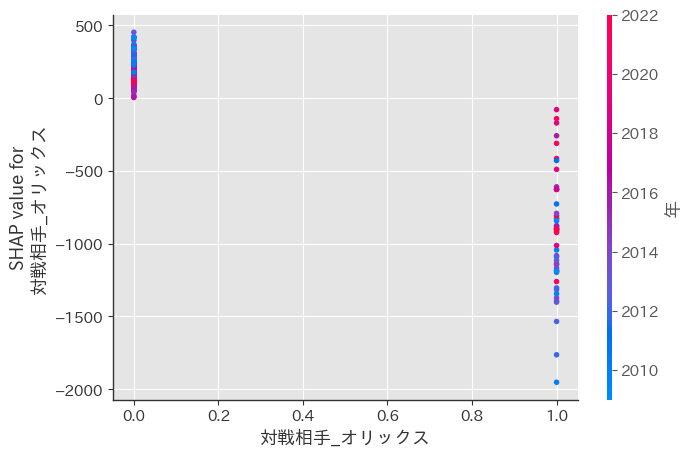

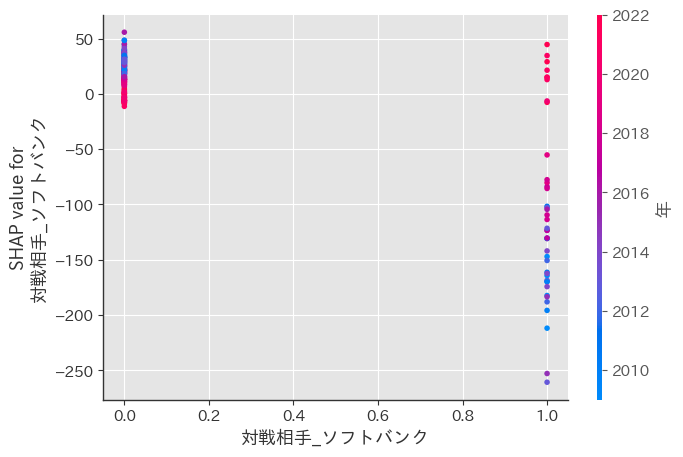

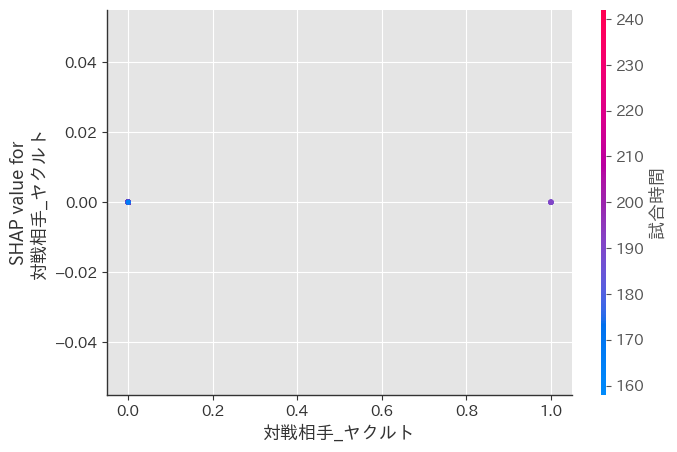

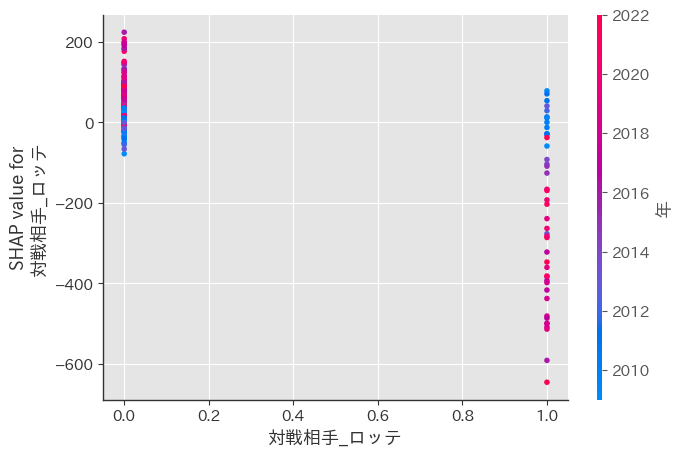

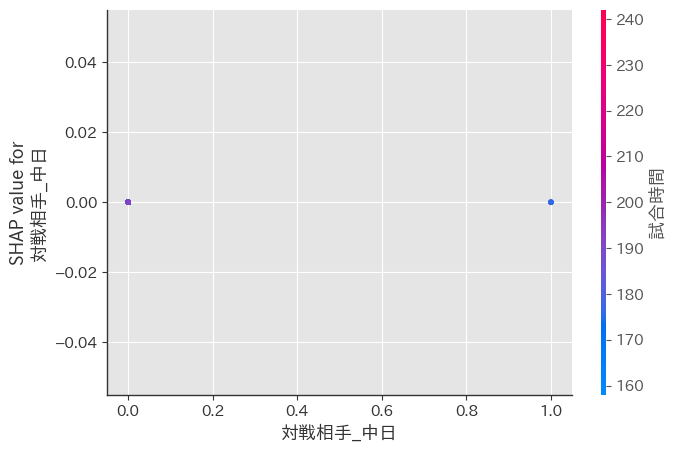

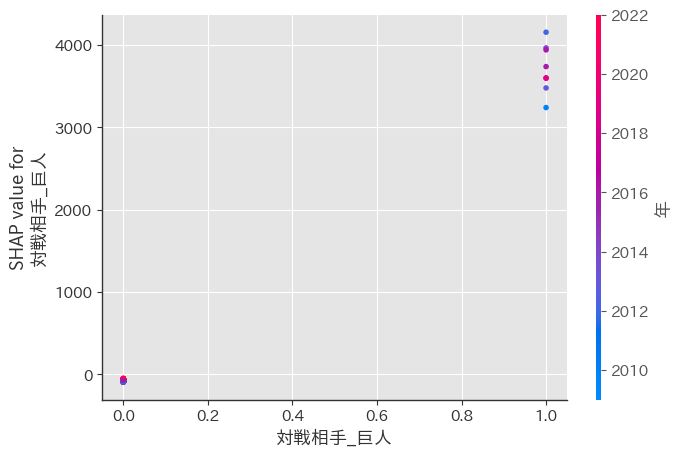

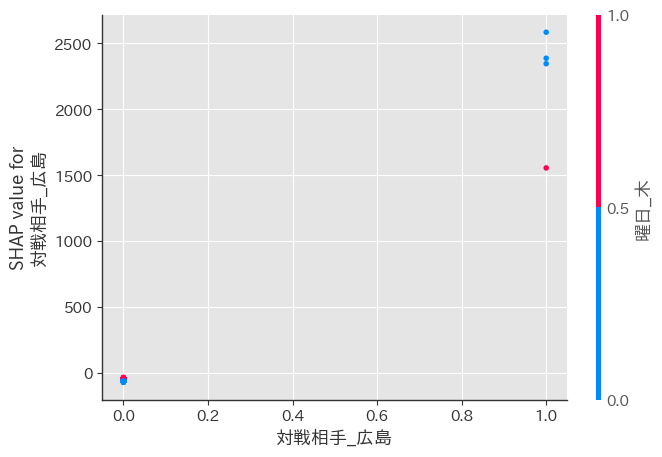

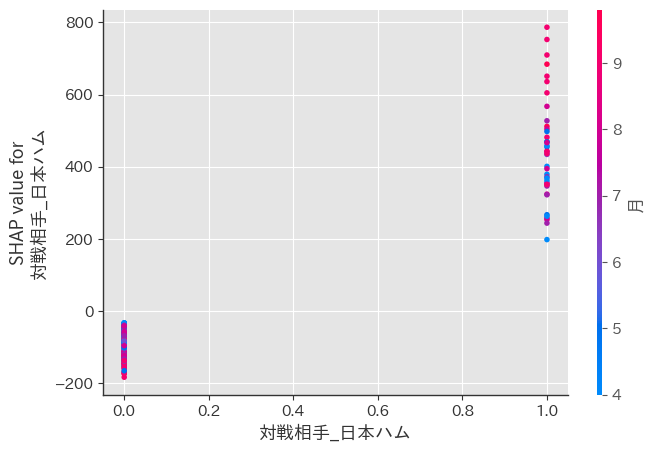

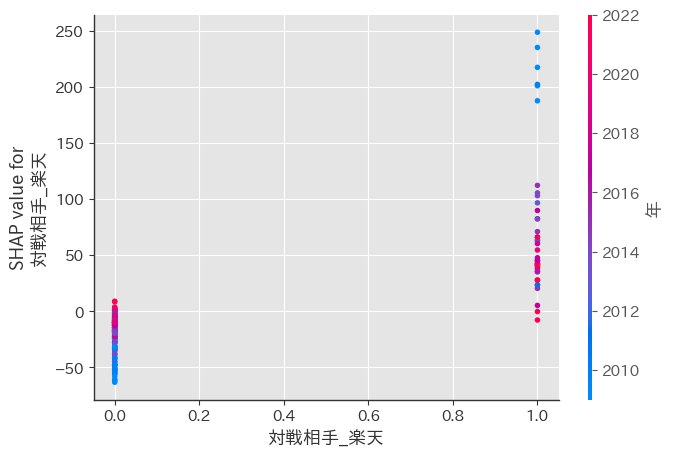

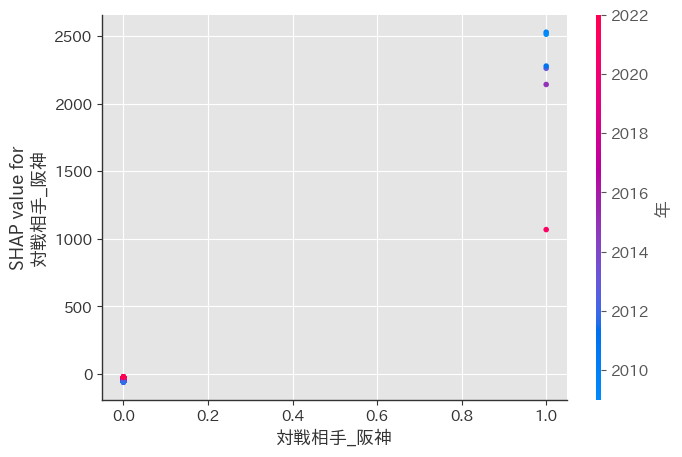

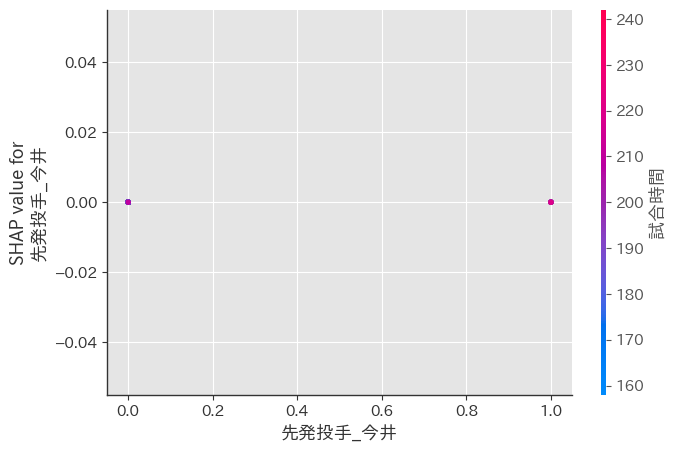

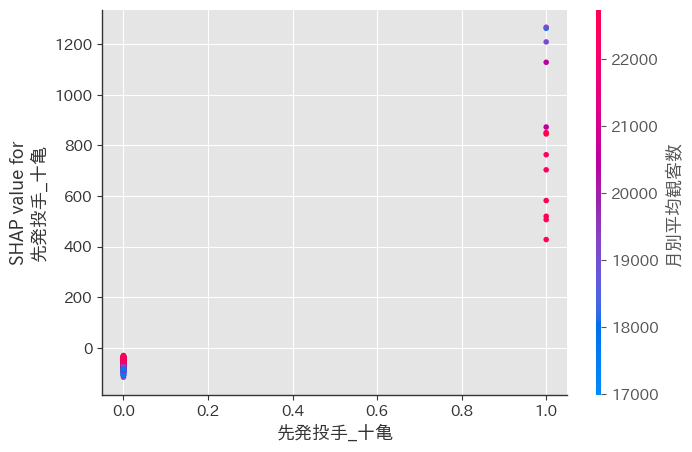

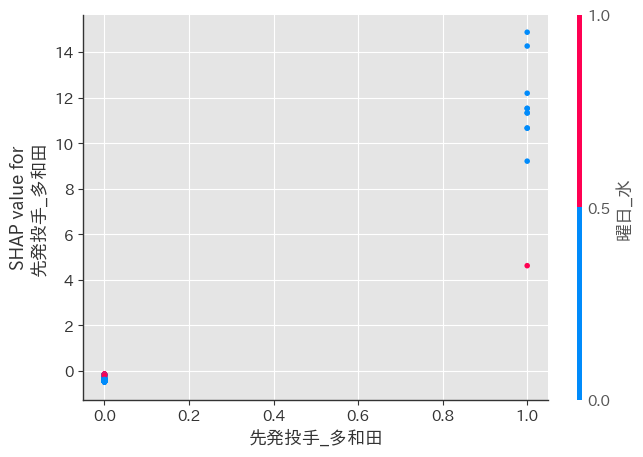

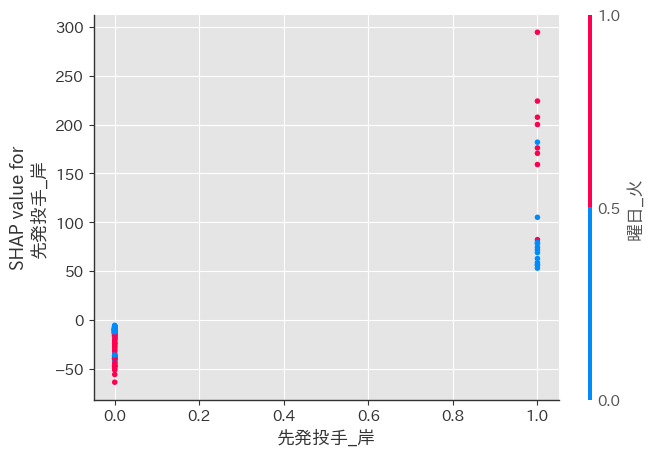

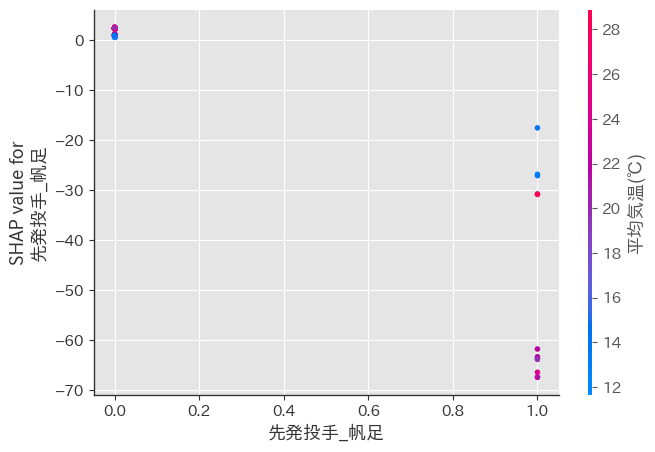

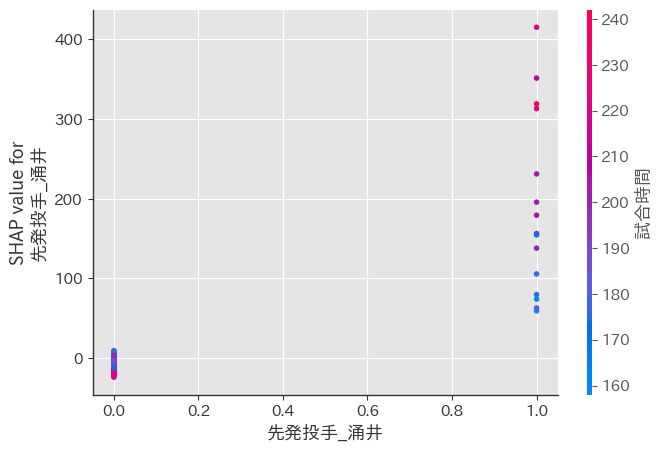

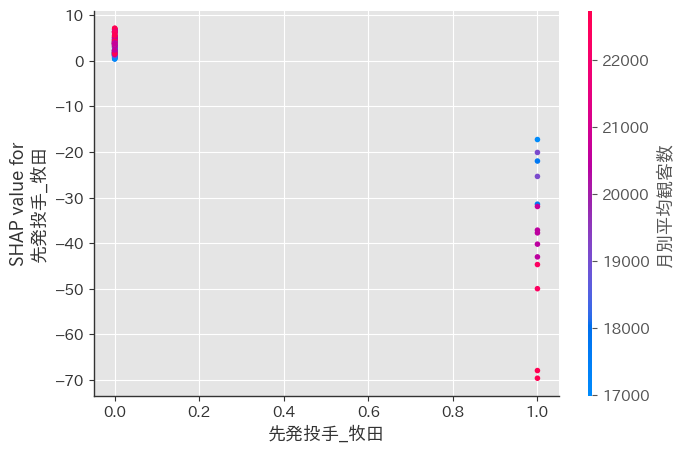

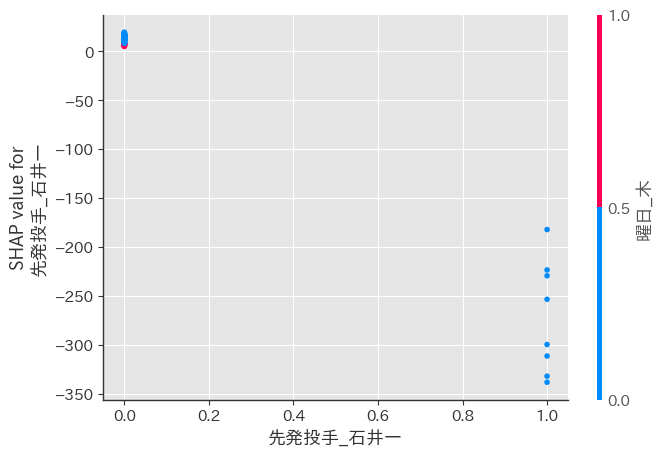

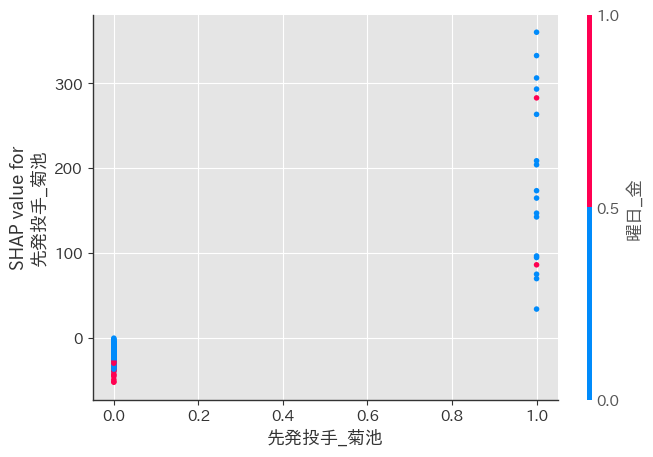

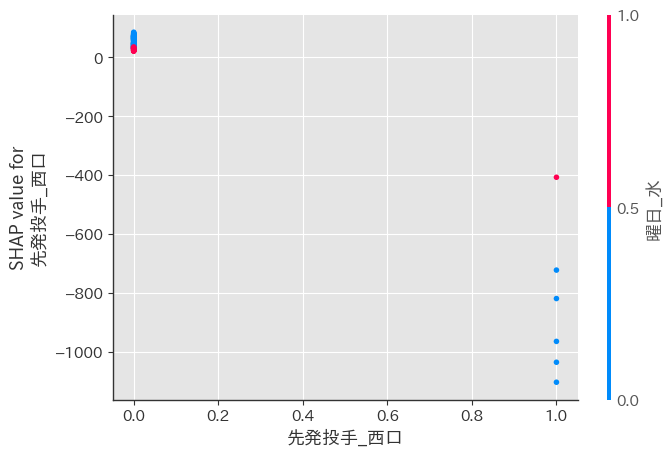

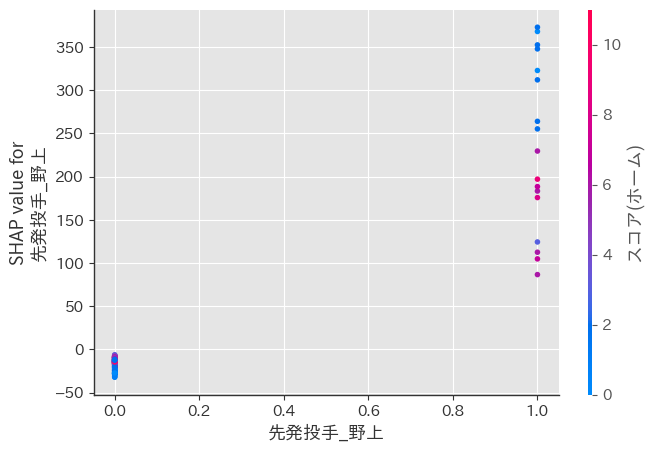

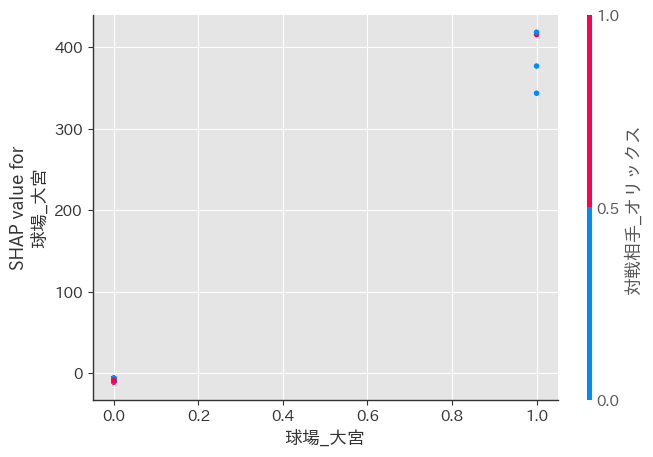

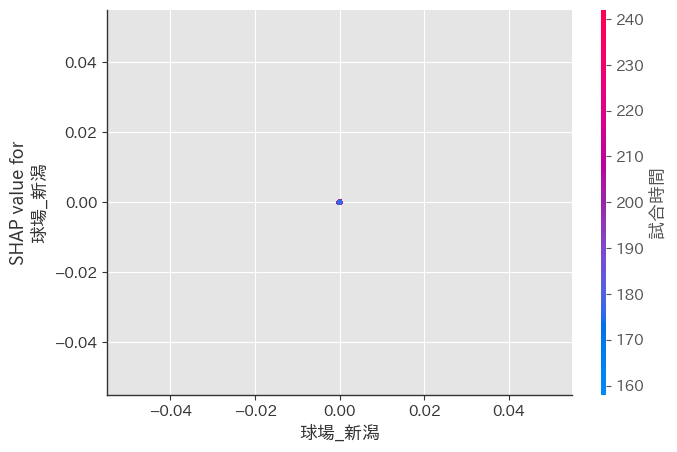

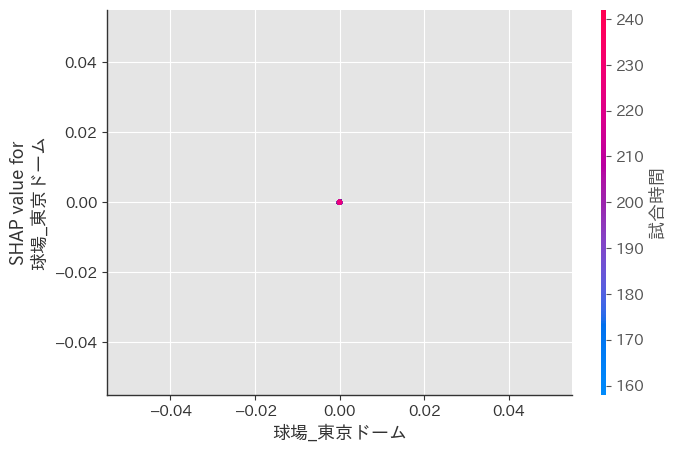

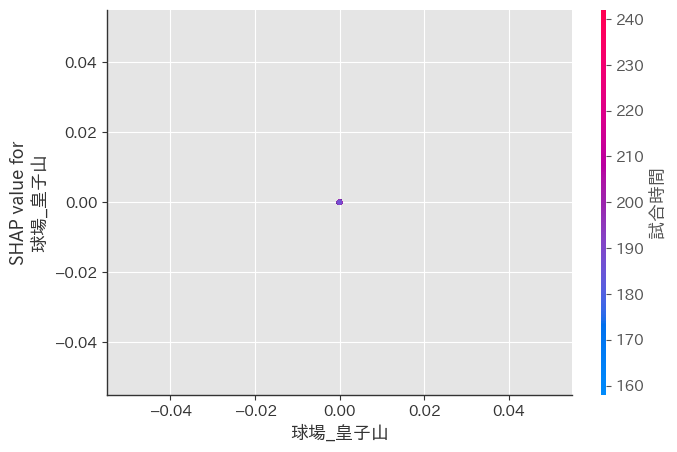

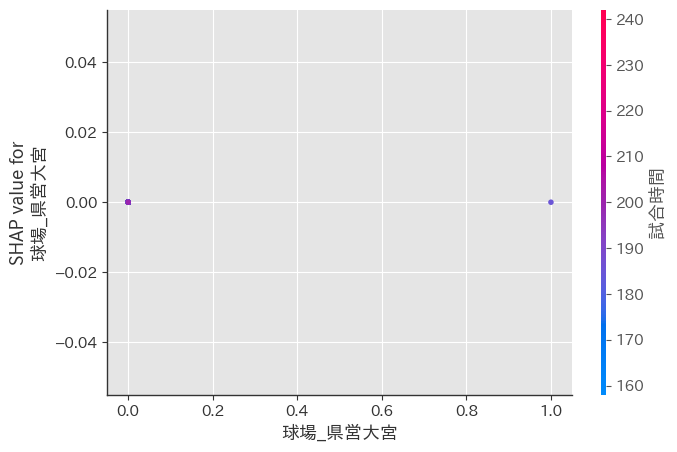

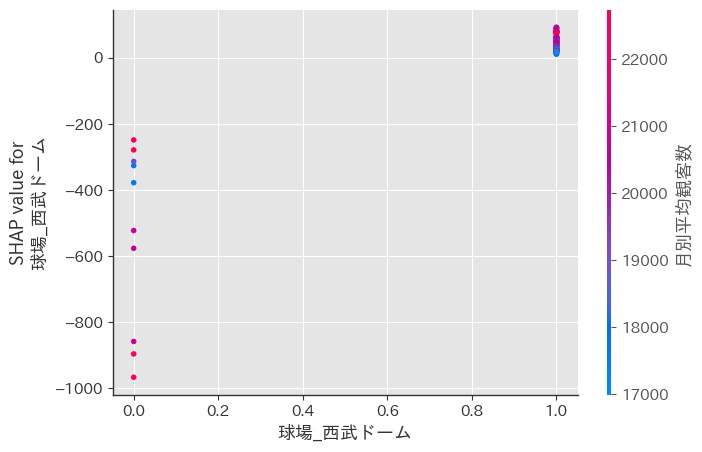

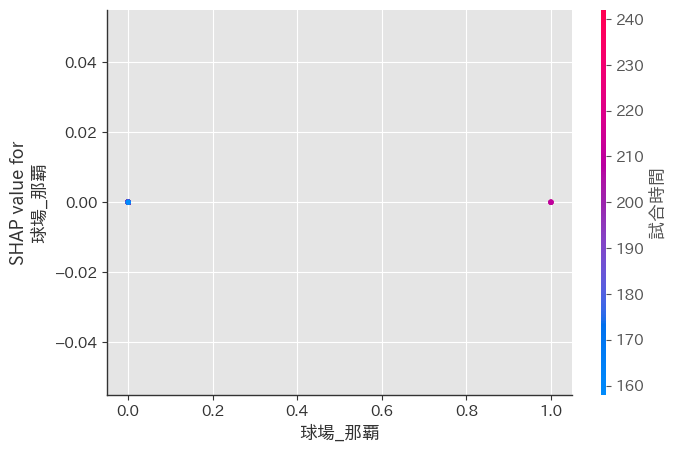

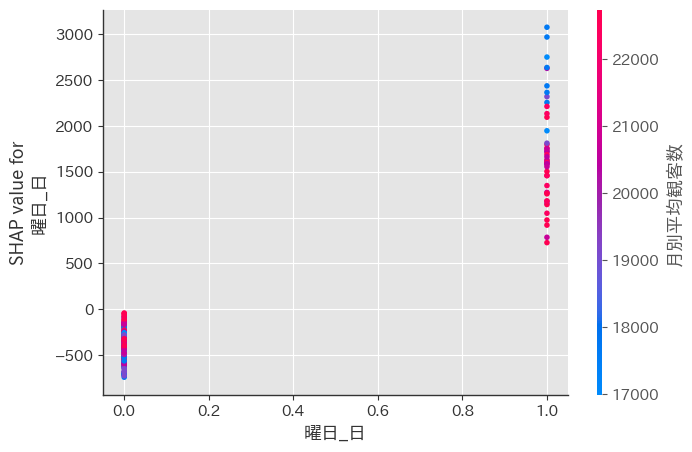

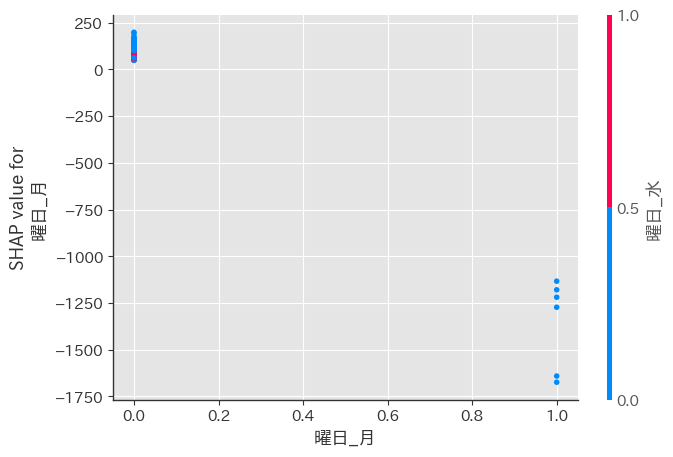

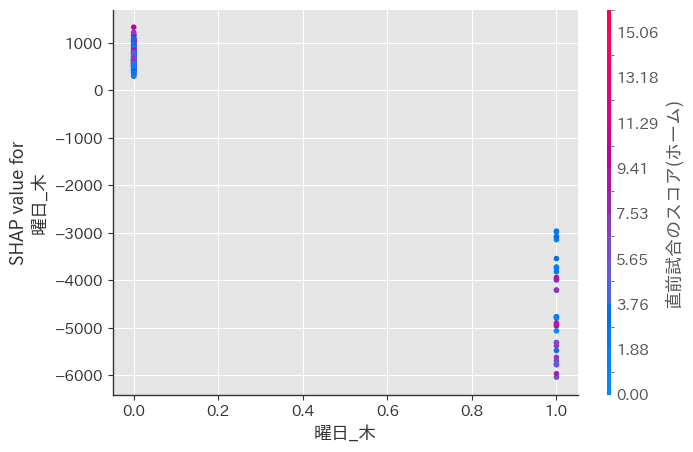

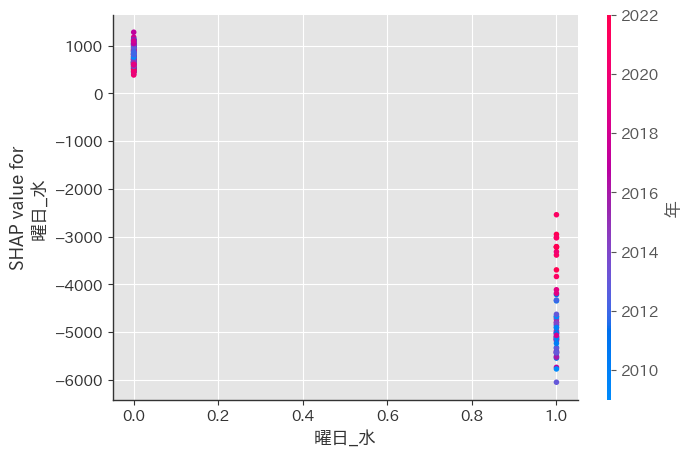

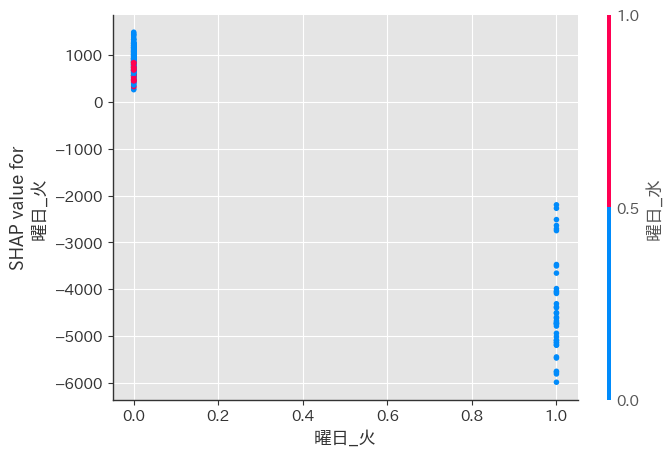

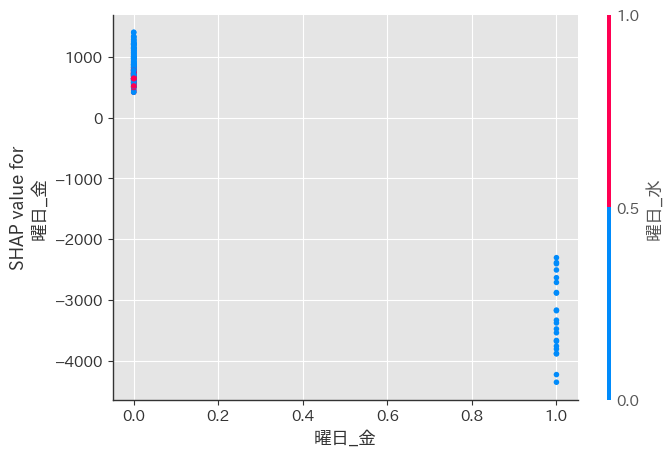

In [92]:
for name in X_test.columns:    
    shap.dependence_plot(name, shap_values.values, X_test)

In [88]:
shap.plots.force(shap_values)

In [93]:
shap.initjs()
shap.plots.force(shap_values[0])